Latar belakang: Dalam industri telekomunikasi, tingkat churn (pelanggan yang berhenti menggunakan layanan) adalah indikator penting dalam menilai kepuasan dan loyalitas pelanggan. Untuk mempertahankan pelanggan dan meningkatkan pendapatan, perusahaan harus memahami karakteristik dan perilaku pelanggan melalui data.

Pertanyaan bisnis:
1. Segementasi Pelanggan
  
  - Apa Apa saja segmen pelanggan yang dapat dibentuk berdasarkan perilaku penggunaan layanan seperti jumlah panggilan, SMS, dan data yang digunakan?


2. Churn dan Risiko

  - Apakah pelanggan dari provider tertentu memiliki tingkat churn yang lebih tinggi
  
  - Adakah hubungan antara jumlah pemakaian layanan (panggilan/SMS/data) dengan kemungkinan churn?

  - Apakah pelanggan dengan estimasi gaji rendah memiliki risiko churn yang lebih tinggi?

3. Strategi CRM

  - Segmen pelanggan mana yang memiliki pemakaian tinggi tetapi tetap menunjukkan risiko churn tinggi?

  - Bagaimana churn rate berdasarkan usia atau jumlah tanggungan?


# 1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway
import statsmodels.api as sm
from scipy.stats import ttest_ind, chi2_contingency

# 2. Data Understanding

In [ ]:
df = pd.read_csv("telecom_churn.csv")
df

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


| Nama Variabel          | Keterangan                                                            | Contoh Nilai       |
|------------------------|------------------------------------------------------------------------|------------------------------|
| customer_id            | ID unik untuk setiap pelanggan                                         | 243549                        |
| telecom_partner        | Nama penyedia layanan telekomunikasi                                  | Reliance Jio, BSNL      |
| gender                 | Jenis kelamin pelanggan                                                | M / F                    |
| age                    | Usia pelanggan                                                         | 28, 52, 59                   |
| state                  | Negara bagian tempat pelanggan tinggal                                | Mizoram, Assam        |
| city                   | Kota tempat pelanggan tinggal                                          | Delhi, Kolkata           |
| pincode                | Kode pos pelanggan                                                     | 110295              |
| date_of_registration   | Tanggal pelanggan mendaftar                                            | '2020-01-01'                |
| num_dependents         | Jumlah tanggungan (anak/keluarga) pelanggan                           | 0, 1, 2, 3                      |
| estimated_salary       | Perkiraan gaji pelanggan (dalam INR)                                  | 38722, 148828               |
| calls_made             | Jumlah panggilan yang dilakukan                                        | 44, 28, 80                   |
| sms_sent               | Jumlah SMS yang dikirim                                                | 9, 45, 7                   |
| data_used              | Jumlah data internet yang digunakan                 | 4102, 7521, 1125              |
| churn                  | Status churn (1 = berhenti, 0 = tetap pelanggan)                       | 0 atau 1                     |


In [ ]:
df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [ ]:
df.describe(include=object)

,telecom_partner,gender,state,city,date_of_registration
count,243553,243553,243553,243553,243553
unique,4,2,28,6,1220
top,Reliance Jio,M,Uttarakhand,Chennai,2023-05-02
freq,61123,145977,8856,40749,200


# 3. Data Cleansing

In [ ]:
df = df.drop(columns=['customer_id', 'pincode'])

In [ ]:
df[df['calls_made']<0][['calls_made']]

,calls_made
68,-1
109,-3
154,-5
180,-10
190,-3
...,...
243125,-2
243169,-2
243210,-4
243278,-7


In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
df = df [(df[numeric_cols] >= 0).all(axis=1)]

In [ ]:
df.describe()

,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000
mean,46.075418,1.998607,85045.042114,50.490378,24.769269,5126.822960,0.200013
std,16.441448,1.414828,37521.056232,28.464511,14.202591,2851.962886,0.400010
min,18.000000,0.000000,20000.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,52576.250000,26.000000,13.000000,2674.000000,0.000000
50%,46.000000,2.000000,85008.000000,50.000000,25.000000,5108.000000,0.000000
75%,60.000000,3.000000,117553.000000,75.000000,37.000000,7555.000000,0.000000
max,74.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [ ]:
df.isnull().sum()

,0
telecom_partner,0
gender,0
age,0
state,0
city,0
date_of_registration,0
num_dependents,0
estimated_salary,0
calls_made,0
sms_sent,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# 4. Exploratory Data Analysis (EDA)

## Distribusi data

In [ ]:
fitur_numerik = ['customer_id', 'age', 'pincode', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'churn']
fitur_kategorik = ["telecom_partner", "gender", "state", "city", "date_of_registration"]

                 Jumlah Sampel  Persentase
telecom_partner                           
Reliance Jio             56123        25.1
Vodafone                 55990        25.0
Airtel                   55937        25.0
BSNL                     55916        25.0


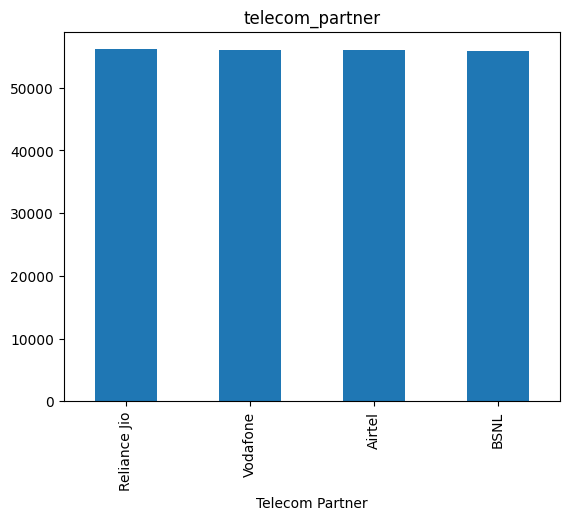

In [ ]:
feature = fitur_kategorik[0]
count_TP = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_TP = pd.DataFrame({"Jumlah Sampel": count_TP, "Persentase": percent.round(1)})
print(df_TP)
count_TP.plot(kind="bar", title=feature)
plt.xlabel("Telecom Partner")
plt.show()

        Jumlah Sampel  Persentase
gender                           
M              134187        59.9
F               89779        40.1


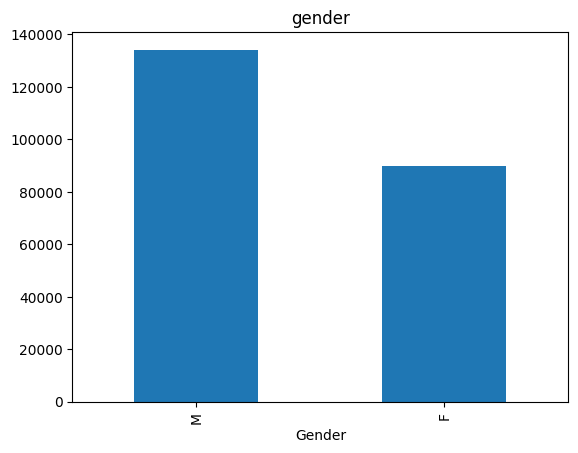

In [ ]:
feature = fitur_kategorik[1]
count_gender = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_gender = pd.DataFrame({"Jumlah Sampel": count_gender, "Persentase": percent.round(1)})
print(df_gender)
count_gender.plot(kind="bar", title=feature)
plt.xlabel("Gender")
plt.show()

                   Jumlah Sampel  Persentase
state                                       
Uttarakhand                 8149         3.6
Madhya Pradesh              8112         3.6
Arunachal Pradesh           8104         3.6
Maharashtra                 8099         3.6
Karnataka                   8094         3.6
Jharkhand                   8043         3.6
Rajasthan                   8038         3.6
Haryana                     8037         3.6
Uttar Pradesh               8033         3.6
Mizoram                     8028         3.6
Tamil Nadu                  8022         3.6
Sikkim                      8003         3.6
Kerala                      8002         3.6
Odisha                      8002         3.6
Himachal Pradesh            8001         3.6
Goa                         7995         3.6
Chhattisgarh                7992         3.6
Telangana                   7988         3.6
Andhra Pradesh              7981         3.6
Bihar                       7972         3.6
Tripura   

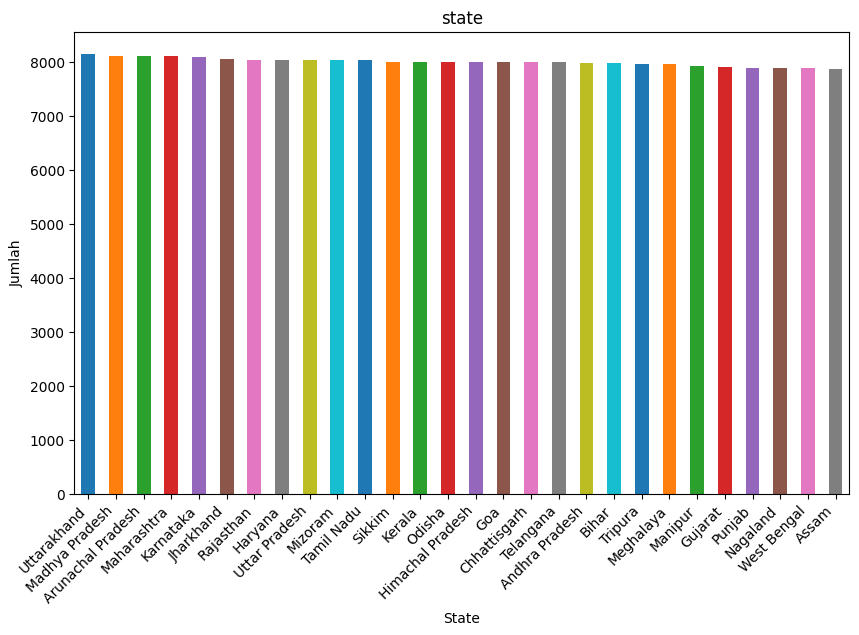

In [ ]:
feature = fitur_kategorik[2]
count_state = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_state = pd.DataFrame({"Jumlah Sampel": count_state, "Persentase": percent.round(1)})
print(df_state)
colors = plt.cm.tab10.colors[:len(count_state)]
ax = count_state.plot(kind="bar",
                     title=feature,
                     color=colors,
                     figsize=(10, 6))
plt.xlabel("State")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha='right')
plt.show()

           Jumlah Sampel  Persentase
city                                
Chennai            37535        16.8
Kolkata            37423        16.7
Hyderabad          37373        16.7
Bangalore          37305        16.7
Delhi              37210        16.6
Mumbai             37120        16.6


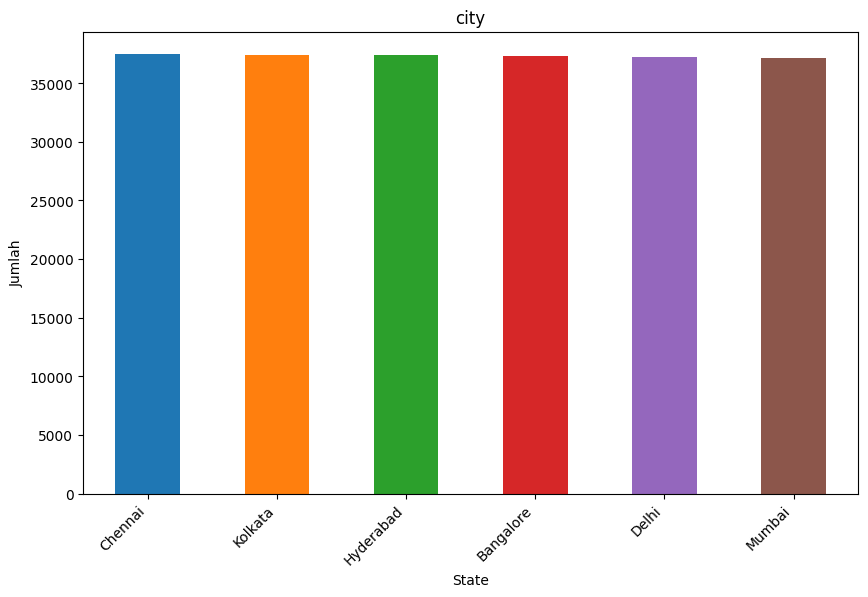

In [ ]:
feature = fitur_kategorik[3]
count_city = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_city = pd.DataFrame({"Jumlah Sampel": count_city, "Persentase": percent.round(1)})
print(df_city)
colors = plt.cm.tab10.colors[:len(count_city)]
ax = count_city.plot(kind="bar",
                     title=feature,
                     color=colors,
                     figsize=(10, 6))
plt.xlabel("State")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha='right')
plt.show()

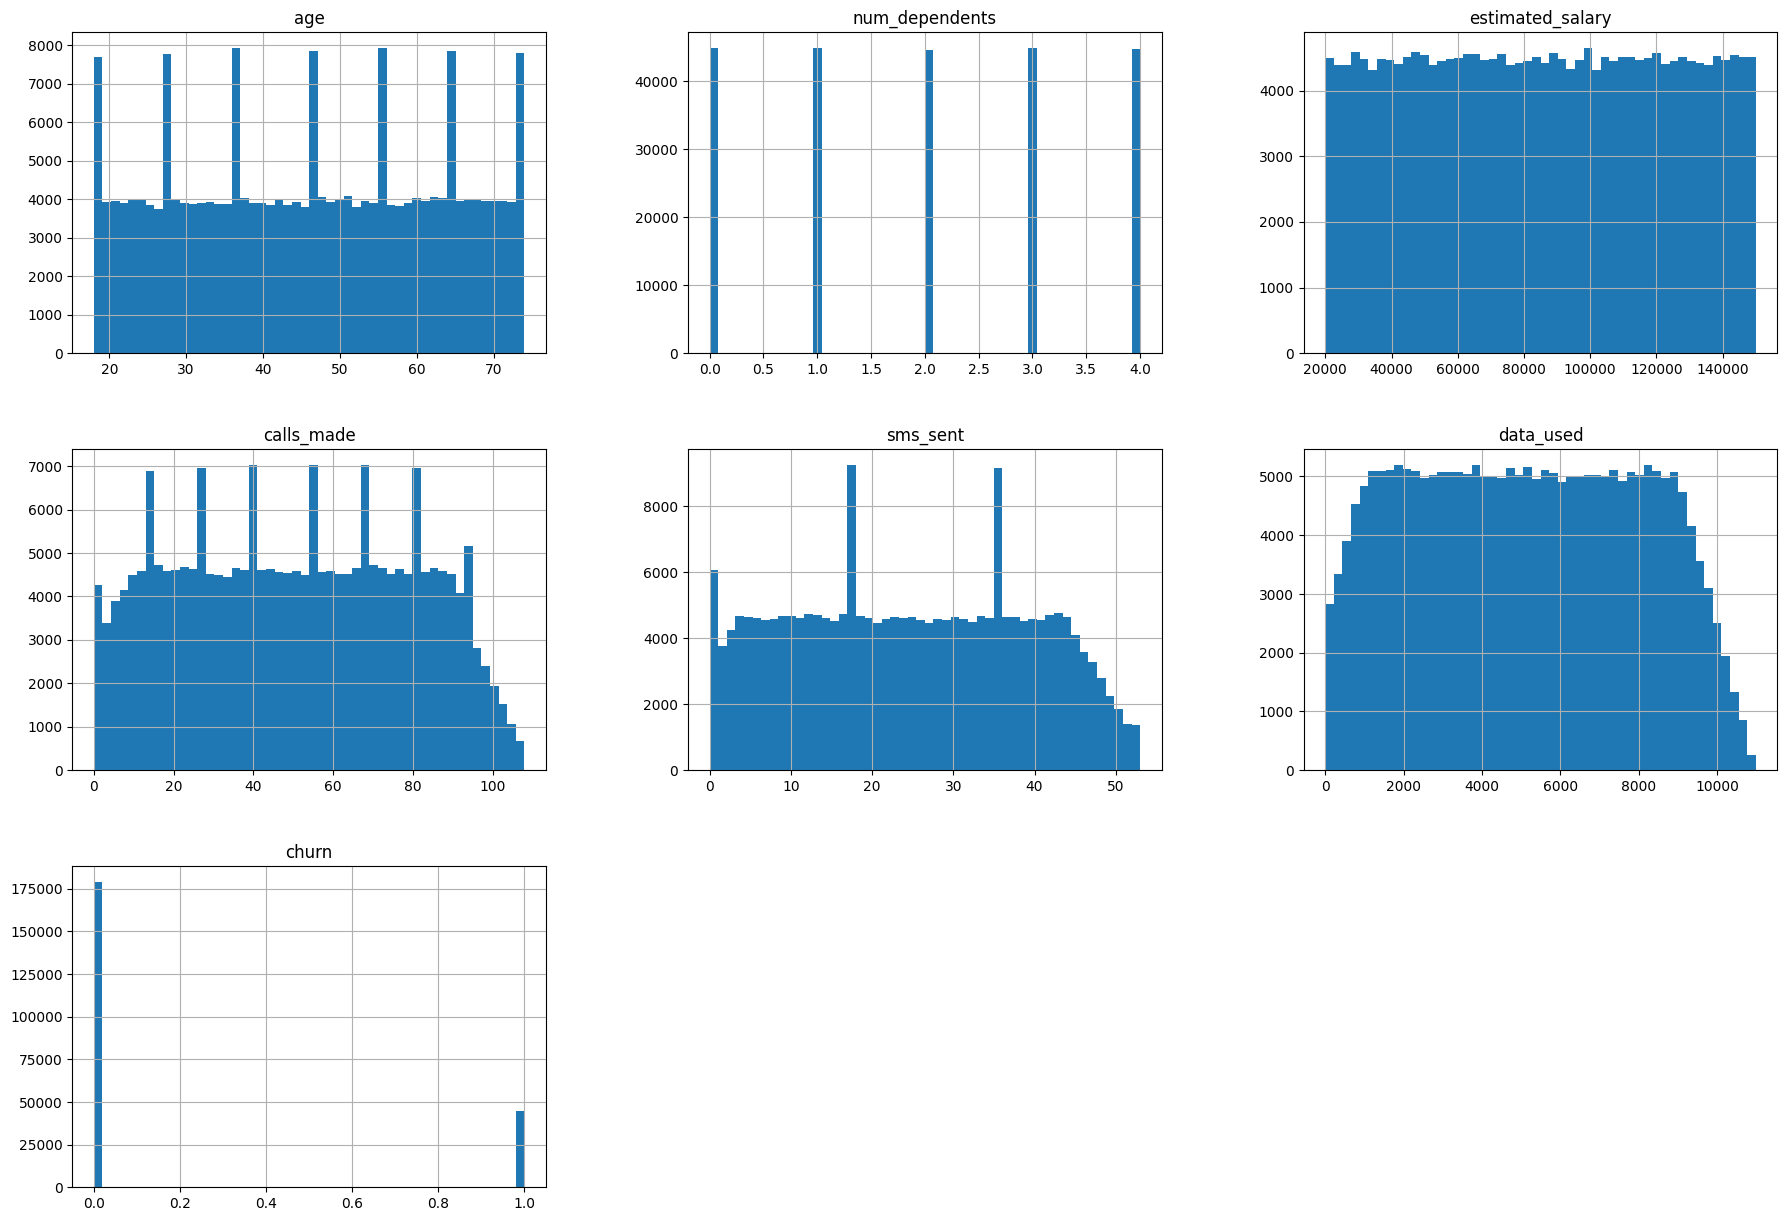

In [ ]:
df.hist(bins = 50, figsize = (22, 15))
plt.show()

In [ ]:
df.head()

,telecom_partner,gender,age,state,city,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
1,Reliance Jio,F,55,Mizoram,Mumbai,2020-01-01,2,130556,62,39,5973,0
2,Vodafone,F,57,Arunachal Pradesh,Delhi,2020-01-01,0,148828,49,24,193,1
3,BSNL,M,46,Tamil Nadu,Kolkata,2020-01-01,1,38722,80,25,9377,1
4,BSNL,F,26,Tripura,Delhi,2020-01-01,2,55098,78,15,1393,0
5,Vodafone,M,36,Uttarakhand,Chennai,2020-01-01,1,73452,91,24,8109,0


In [ ]:
df.describe()

,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000
mean,46.075418,1.998607,85045.042114,50.490378,24.769269,5126.822960,0.200013
std,16.441448,1.414828,37521.056232,28.464511,14.202591,2851.962886,0.400010
min,18.000000,0.000000,20000.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,52576.250000,26.000000,13.000000,2674.000000,0.000000
50%,46.000000,2.000000,85008.000000,50.000000,25.000000,5108.000000,0.000000
75%,60.000000,3.000000,117553.000000,75.000000,37.000000,7555.000000,0.000000
max,74.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


## 1.1 Segmen Panggilan

In [ ]:
def categorize_calls(x):
    if x > 60:
        return 'Banyak'
    elif x >= 25:
        return 'Sedang'
    else:
        return 'Sedikit'

df['kategori_panggilan'] = df['calls_made'].apply(categorize_calls)

In [ ]:
def categorize_income(x):
    if x < 60000:
        return 'Rendah'
    elif x <= 100000:
        return 'Sedang'
    else:
        return 'Tinggi'

df['kategori_pendapatan'] = df['estimated_salary'].apply(categorize_income)

In [ ]:
sns.set(style="whitegrid")

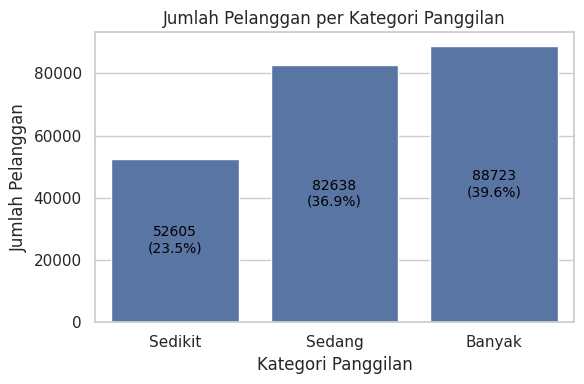

In [ ]:
jumlah_kategori = df['kategori_panggilan'].value_counts().reindex(['Sedikit', 'Sedang', 'Banyak'])
total_pelanggan = jumlah_kategori.sum()

plt.figure(figsize=(6, 4))
bars = sns.barplot(
    x=jumlah_kategori.index,
    y=jumlah_kategori.values
)
plt.title('Jumlah Pelanggan per Kategori Panggilan')
plt.xlabel('Kategori Panggilan')
plt.ylabel('Jumlah Pelanggan')

for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    persen = (height / total_pelanggan) * 100
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height / 2,
        f'{int(height)}\n({persen:.1f}%)',
        ha='center', va='center', color='black', fontsize=10
    )

plt.tight_layout()
plt.show()

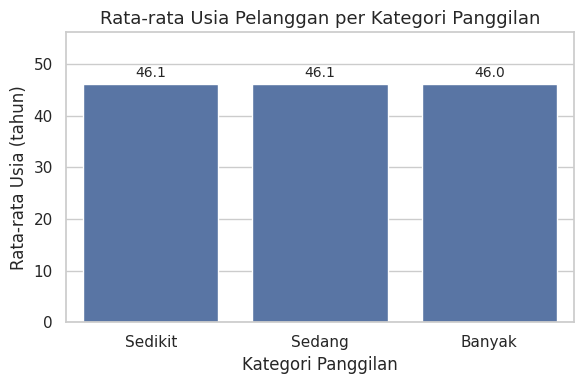

In [ ]:
rata_rata_usia = df.groupby('kategori_panggilan')['age'].mean()
rata_rata_usia = rata_rata_usia.reindex(['Sedikit', 'Sedang', 'Banyak'])

plt.figure(figsize=(6, 4))
bars = sns.barplot(
    x=rata_rata_usia.index,
    y=rata_rata_usia.values,
)

plt.title('Rata-rata Usia Pelanggan per Kategori Panggilan', fontsize=13)
plt.xlabel('Kategori Panggilan')
plt.ylabel('Rata-rata Usia (tahun)')

for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.8,
        f"{height:.1f}",
        ha='center', va='bottom', fontsize=10
    )

plt.ylim(0, rata_rata_usia.max() + 10)
plt.tight_layout()
plt.show()

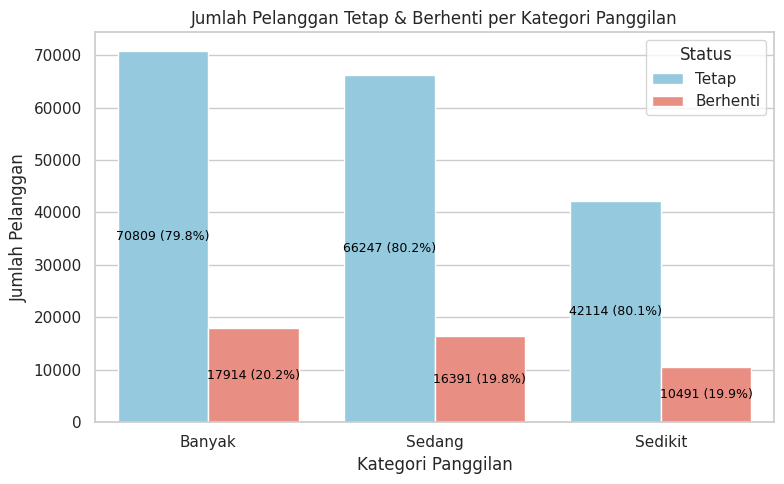

In [ ]:
churn_counts = df.groupby(['kategori_panggilan', 'churn']).size().unstack(fill_value=0)
churn_counts.columns = ['Tetap', 'Berhenti']
churn_counts = churn_counts.reset_index().melt(id_vars='kategori_panggilan',
                                               value_vars=['Tetap', 'Berhenti'],
                                               var_name='Status',
                                               value_name='Jumlah')

total_per_kategori = churn_counts.groupby('kategori_panggilan')['Jumlah'].transform('sum')
churn_counts['Persentase'] = (churn_counts['Jumlah'] / total_per_kategori * 100).round(1)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=churn_counts, x='kategori_panggilan', y='Jumlah', hue='Status',
                 palette={'Tetap': 'skyblue', 'Berhenti': 'salmon'})

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height / 2,
            s=f"{height:.0f} ({p.get_height() / total_per_kategori[churn_counts.index[ax.patches.index(p)]] * 100:.1f}%)",
            ha='center',
            va='center',
            fontsize=9,
            color='black'
        )

plt.title("Jumlah Pelanggan Tetap & Berhenti per Kategori Panggilan")
plt.xlabel("Kategori Panggilan")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title='Status')
plt.tight_layout()
plt.show()

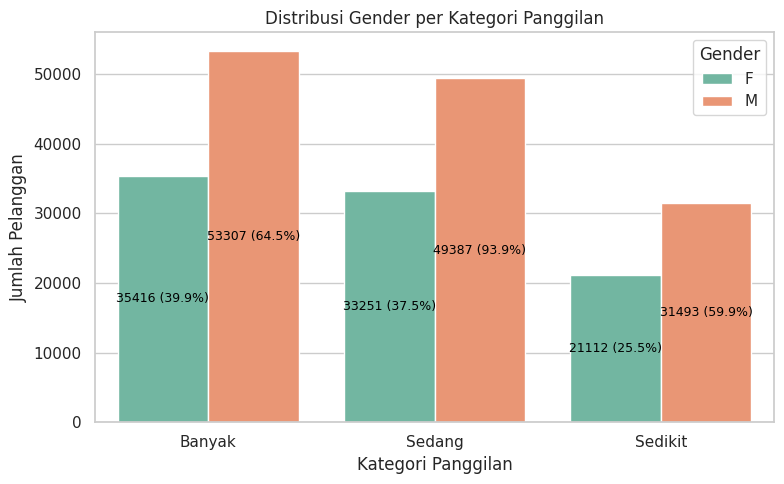

In [ ]:
gender_counts = df.groupby(['kategori_panggilan', 'gender']).size().reset_index(name='Jumlah')

total_per_kategori = gender_counts.groupby('kategori_panggilan')['Jumlah'].transform('sum')
gender_counts['Persentase'] = (gender_counts['Jumlah'] / total_per_kategori * 100).round(1)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=gender_counts, x='kategori_panggilan', y='Jumlah',
                 hue='gender', palette='Set2')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height / 2,
            s=f"{height:.0f} ({height / total_per_kategori[gender_counts.index[ax.patches.index(p)]] * 100:.1f}%)",
            ha='center',
            va='center',
            fontsize=9,
            color='black'
        )

plt.title("Distribusi Gender per Kategori Panggilan")
plt.xlabel("Kategori Panggilan")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

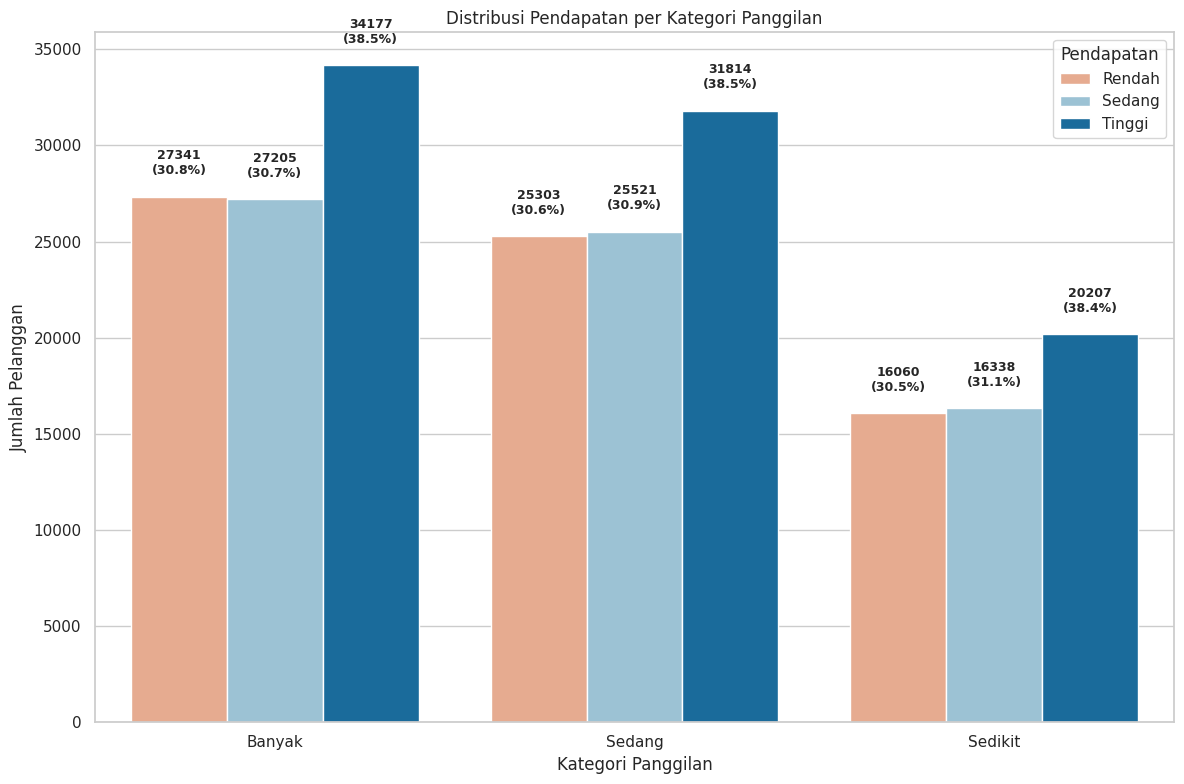

In [ ]:
pendapatan_counts = df.groupby(['kategori_panggilan', 'kategori_pendapatan']).size().reset_index(name='Jumlah')
totals = pendapatan_counts.groupby('kategori_panggilan')['Jumlah'].sum().to_dict()

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=pendapatan_counts, x='kategori_panggilan', y='Jumlah',
                 hue='kategori_pendapatan',
                 palette={'Rendah': '#f4a582', 'Sedang': '#92c5de', 'Tinggi': '#0571b0'})

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        y = height + 1000
        kategori = bar.get_x()
        kategori_label = bar.get_label().split("/")[0] if "/" in bar.get_label() else None

        kategori_panggilan = bar.get_label()
        x_tick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
        idx = round(bar.get_x() + bar.get_width() / 2)
        if idx < len(x_tick_labels):
            kategori_panggilan = x_tick_labels[idx]

        total_kategori = totals.get(kategori_panggilan, 1)
        percentage = (height / total_kategori) * 100

        ax.text(x, y, f'{int(height)}\n({percentage:.1f}%)',
                ha='center', va='bottom', fontsize=9, weight='bold')

plt.title("Distribusi Pendapatan per Kategori Panggilan")
plt.xlabel("Kategori Panggilan")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title='Pendapatan', loc='upper right')
plt.tight_layout()
plt.show()

## 1.2 SMS

In [ ]:
def kategori_sms(jml_sms):
    if jml_sms < 25:
        return 'Sedikit'
    elif jml_sms < 37:
        return 'Sedang'
    else:
        return 'Banyak'

df['kategori_sms'] = df['sms_sent'].apply(kategori_sms)

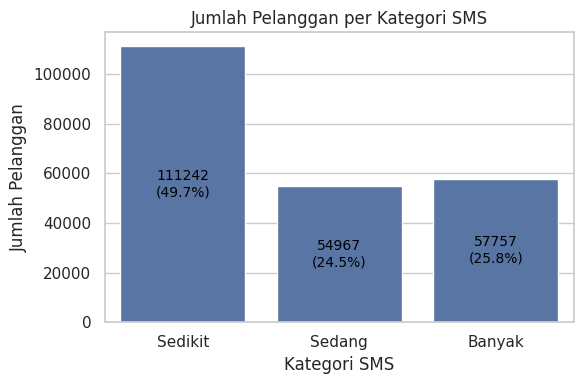

In [ ]:
jumlah_kategori_sms = df['kategori_sms'].value_counts().reindex(['Sedikit', 'Sedang', 'Banyak'])
total_sms = jumlah_kategori_sms.sum()

plt.figure(figsize=(6, 4))
bars = sns.barplot(x=jumlah_kategori_sms.index, y=jumlah_kategori_sms.values)
plt.title('Jumlah Pelanggan per Kategori SMS')
plt.xlabel('Kategori SMS')
plt.ylabel('Jumlah Pelanggan')

for bar in bars.patches:
    height = bar.get_height()
    persen = (height / total_sms) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{int(height)}\n({persen:.1f}%)',
             ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

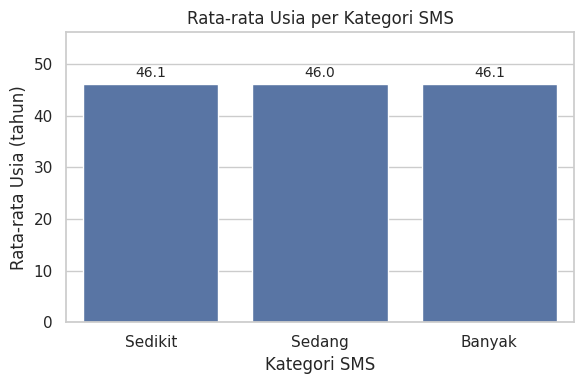

In [ ]:
rata_usia_sms = df.groupby('kategori_sms')['age'].mean().reindex(['Sedikit', 'Sedang', 'Banyak'])

plt.figure(figsize=(6, 4))
bars = sns.barplot(x=rata_usia_sms.index, y=rata_usia_sms.values)
plt.title('Rata-rata Usia per Kategori SMS')
plt.xlabel('Kategori SMS')
plt.ylabel('Rata-rata Usia (tahun)')

for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.8, f"{height:.1f}",
             ha='center', va='bottom', fontsize=10)

plt.ylim(0, rata_usia_sms.max() + 10)
plt.tight_layout()
plt.show()

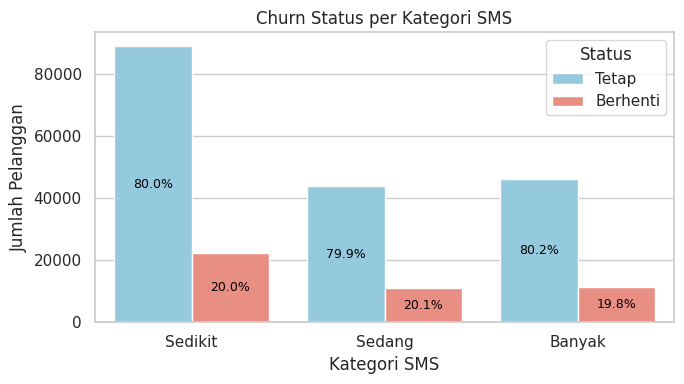

In [ ]:
churn_sms = df.groupby(['kategori_sms', 'churn']).size().unstack(fill_value=0).reindex(['Sedikit', 'Sedang', 'Banyak'])
churn_sms.columns = ['Tetap', 'Berhenti']
churn_sms_plot = churn_sms.reset_index().melt(id_vars='kategori_sms', value_name='Jumlah', var_name='Status')

total_sms_kat = churn_sms_plot.groupby('kategori_sms')['Jumlah'].transform('sum')
churn_sms_plot['Persen'] = churn_sms_plot['Jumlah'] / total_sms_kat * 100

plt.figure(figsize=(7, 4))
bars = sns.barplot(data=churn_sms_plot, x='kategori_sms', y='Jumlah', hue='Status', palette=['skyblue', 'salmon'])

for bar, (_, row) in zip(bars.patches, churn_sms_plot.iterrows()):
    height = bar.get_height()
    persen = row['Persen']
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height/2,
                 f"{persen:.1f}%", ha='center', va='center',
                 fontsize=9, color='black')

plt.title('Churn Status per Kategori SMS')
plt.xlabel('Kategori SMS')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

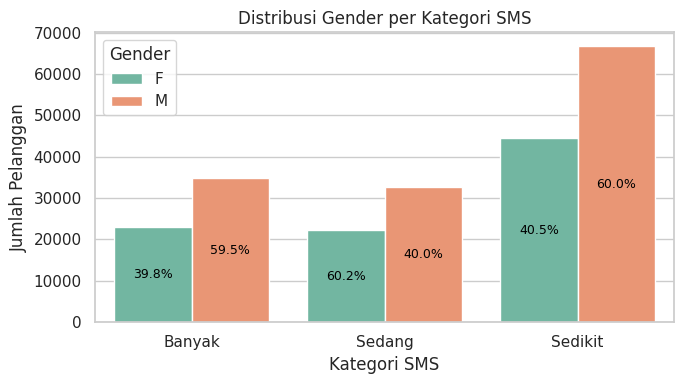

In [ ]:
gender_sms_counts = df.groupby(['kategori_sms', 'gender']).size().reset_index(name='Jumlah')

total_per_kategori = gender_sms_counts.groupby('kategori_sms')['Jumlah'].transform('sum')
gender_sms_counts['Persen'] = 100 * gender_sms_counts['Jumlah'] / total_per_kategori


plt.figure(figsize=(7, 4))
bars = sns.barplot(data=gender_sms_counts, x='kategori_sms', y='Jumlah', hue='gender', palette='Set2')

for bar, (_, row) in zip(bars.patches, gender_sms_counts.iterrows()):
    height = bar.get_height()
    persen = row['Persen']
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height/2,
                 f"{persen:.1f}%", ha='center', va='center',
                 fontsize=9, color='black')

plt.title('Distribusi Gender per Kategori SMS')
plt.xlabel('Kategori SMS')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

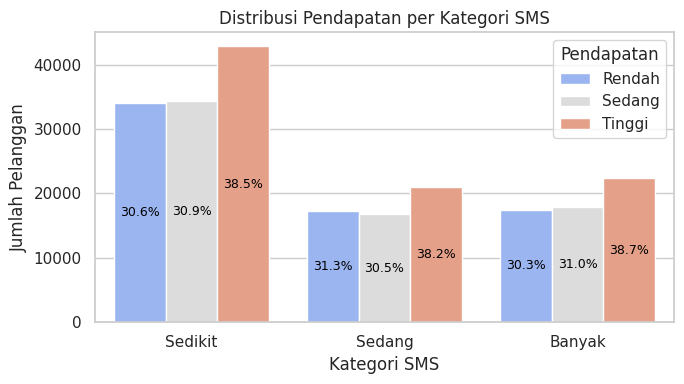

In [ ]:
pendapatan_sms = df.groupby(['kategori_sms', 'kategori_pendapatan']).size().unstack(fill_value=0).reindex(['Sedikit', 'Sedang', 'Banyak'])
pendapatan_sms_plot = pendapatan_sms.reset_index().melt(id_vars='kategori_sms', value_name='Jumlah', var_name='Pendapatan')

total_pendapatan_sms = pendapatan_sms_plot.groupby('kategori_sms')['Jumlah'].transform('sum')
pendapatan_sms_plot['Persen'] = pendapatan_sms_plot['Jumlah'] / total_pendapatan_sms * 100

plt.figure(figsize=(7, 4))
bars = sns.barplot(data=pendapatan_sms_plot, x='kategori_sms', y='Jumlah', hue='Pendapatan', palette='coolwarm')

for bar, (_, row) in zip(bars.patches, pendapatan_sms_plot.iterrows()):
    height = bar.get_height()
    persen = row['Persen']
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height/2,
                 f"{persen:.1f}%", ha='center', va='center',
                 fontsize=9, color='black')

plt.title('Distribusi Pendapatan per Kategori SMS')
plt.xlabel('Kategori SMS')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Pendapatan')
plt.tight_layout()
plt.show()

## 1.3 Data


In [ ]:
def kategorikan_data(x):
    if x > 7555:
        return 'Banyak'
    elif x >= 2674:
        return 'Sedang'
    else:
        return 'Sedikit'

df['kategori_data'] = df['data_used'].apply(kategorikan_data)

/tmp/ipython-input-35-197774271.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{int(height)}\n({persen_data[i]}%)",


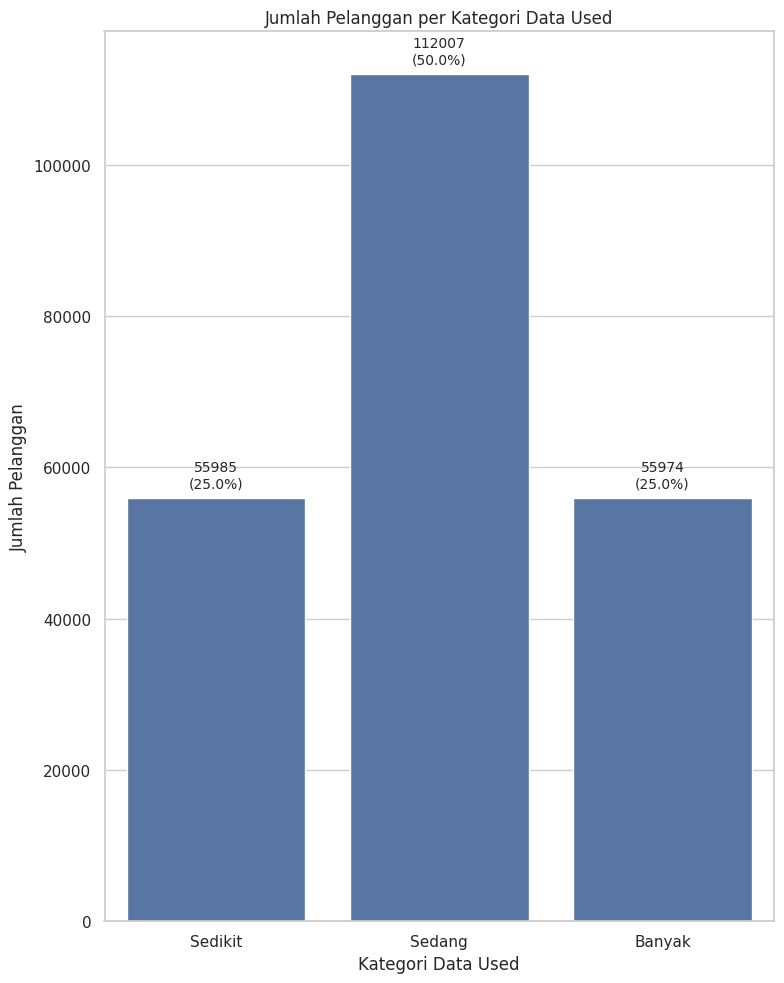

In [ ]:
jumlah_data = df['kategori_data'].value_counts().reindex(['Sedikit', 'Sedang', 'Banyak'])
total_data = jumlah_data.sum()
persen_data = (jumlah_data / total_data * 100).round(1)

plt.figure(figsize=(8, 10))
bars = sns.barplot(x=jumlah_data.index, y=jumlah_data.values)

for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000,
             f"{int(height)}\n({persen_data[i]}%)",
             ha='center', va='bottom', fontsize=10)

plt.title('Jumlah Pelanggan per Kategori Data Used')
plt.xlabel('Kategori Data Used')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

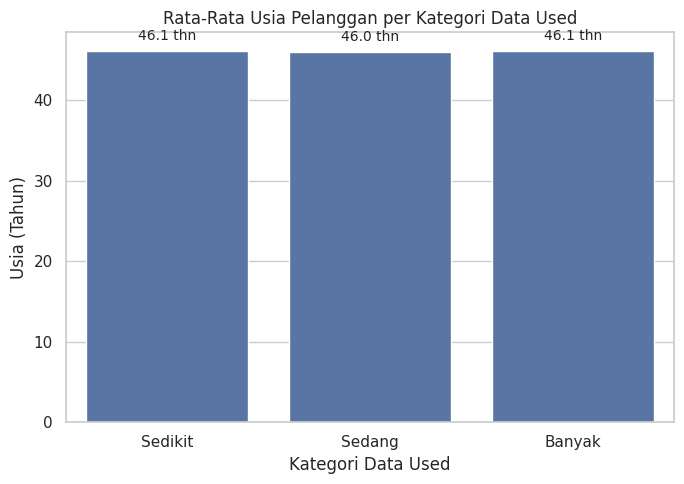

In [ ]:
rata_usia_data = df.groupby('kategori_data')['age'].mean().reindex(['Sedikit', 'Sedang', 'Banyak'])

plt.figure(figsize=(7, 5))
bars = sns.barplot(x=rata_usia_data.index, y=rata_usia_data.values)

for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f"{height:.1f} thn",
             ha='center', va='bottom', fontsize=10)

plt.title('Rata-Rata Usia Pelanggan per Kategori Data Used')
plt.xlabel('Kategori Data Used')
plt.ylabel('Usia (Tahun)')
plt.tight_layout()
plt.show()

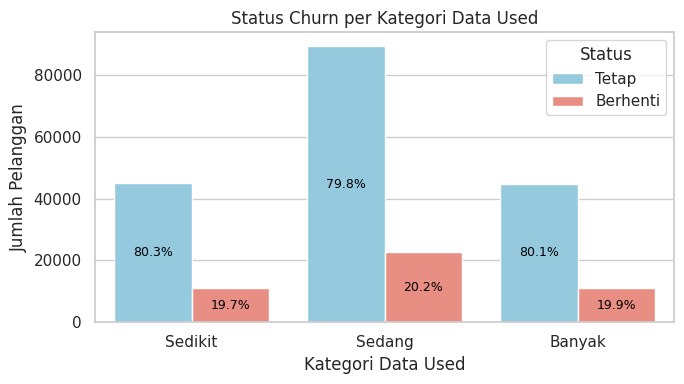

In [ ]:
churn_data = df.groupby(['kategori_data', 'churn']).size().unstack(fill_value=0).reindex(['Sedikit', 'Sedang', 'Banyak'])
churn_data.columns = ['Tetap', 'Berhenti']
churn_data_plot = churn_data.reset_index().melt(id_vars='kategori_data', var_name='Status', value_name='Jumlah')

# Persen
total = churn_data_plot.groupby('kategori_data')['Jumlah'].transform('sum')
churn_data_plot['Persen'] = churn_data_plot['Jumlah'] / total * 100

plt.figure(figsize=(7, 4))
bars = sns.barplot(data=churn_data_plot, x='kategori_data', y='Jumlah', hue='Status', palette=['skyblue', 'salmon'])

for bar, (_, row) in zip(bars.patches, churn_data_plot.iterrows()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
             f"{row['Persen']:.1f}%", ha='center', va='center', fontsize=9, color='black')

plt.title('Status Churn per Kategori Data Used')
plt.xlabel('Kategori Data Used')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

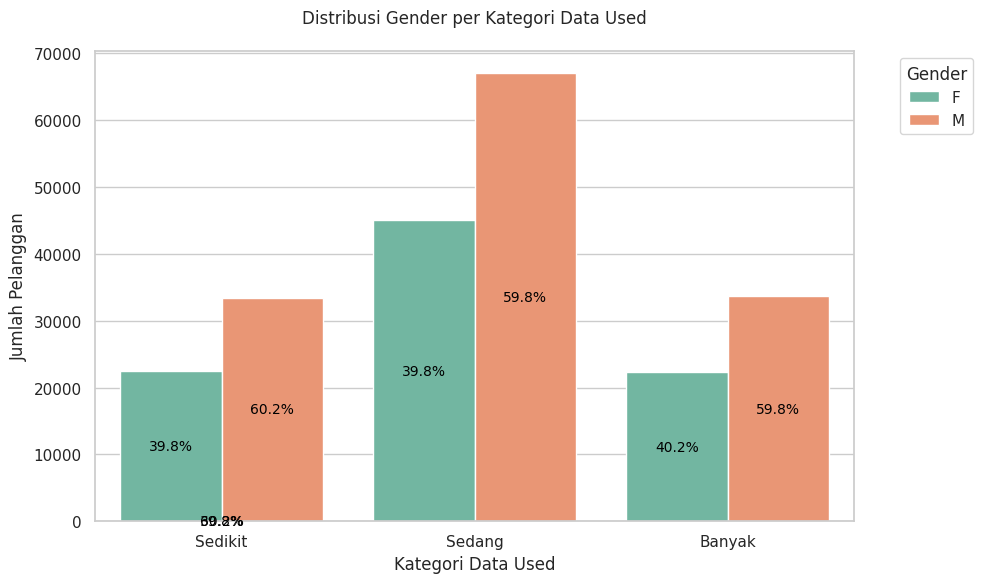

In [ ]:
gender_data = df.groupby(['kategori_data', 'gender']).size().reset_index(name='Jumlah')
gender_data['Persen'] = gender_data.groupby('kategori_data')['Jumlah'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(10, 6))
bars = sns.barplot(
    data=gender_data,
    x='kategori_data',
    y='Jumlah',
    hue='gender',
    palette='Set2',
    order=['Sedikit', 'Sedang', 'Banyak']
)

for bar in bars.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = height

    gender = 'F' if bar.get_facecolor() == bars.patches[0].get_facecolor() else 'M'
    kategori = gender_data['kategori_data'].unique()[int(x + width/2)]
    persen = gender_data[(gender_data['kategori_data'] == kategori) &
                        (gender_data['gender'] == gender)]['Persen'].values[0]

    bars.annotate(f"{persen:.1f}%",
                 (x + width/2, height/2),
                 ha='center', va='center',
                 fontsize=10,
                 color='black')

plt.title('Distribusi Gender per Kategori Data Used', pad=20)
plt.xlabel('Kategori Data Used')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

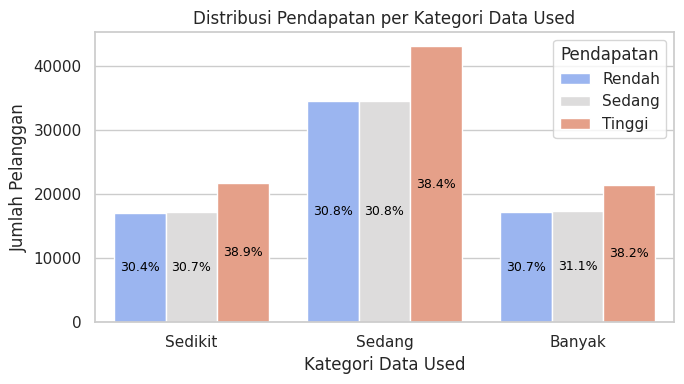

In [ ]:
pendapatan_data = df.groupby(['kategori_data', 'kategori_pendapatan']).size().unstack(fill_value=0).reindex(['Sedikit', 'Sedang', 'Banyak'])
pendapatan_data_plot = pendapatan_data.reset_index().melt(id_vars='kategori_data', value_name='Jumlah', var_name='Pendapatan')

total = pendapatan_data_plot.groupby('kategori_data')['Jumlah'].transform('sum')
pendapatan_data_plot['Persen'] = pendapatan_data_plot['Jumlah'] / total * 100

plt.figure(figsize=(7, 4))
bars = sns.barplot(data=pendapatan_data_plot, x='kategori_data', y='Jumlah', hue='Pendapatan', palette='coolwarm')

for bar, (_, row) in zip(bars.patches, pendapatan_data_plot.iterrows()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
             f"{row['Persen']:.1f}%", ha='center', va='center', fontsize=9, color='black')

plt.title('Distribusi Pendapatan per Kategori Data Used')
plt.xlabel('Kategori Data Used')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Pendapatan')
plt.tight_layout()
plt.show()

## Segment Pengguna

In [ ]:
def tentukan_segmen(row):
    kategori = [row['kategori_panggilan'], row['kategori_sms'], row['kategori_data']]
    banyak = kategori.count('Banyak')
    sedang = kategori.count('Sedang')

    if banyak >= 2:
        return 'Heavy Users'
    elif sedang >= 2:
        return 'Medium Users'
    else:
        return 'Light Users'

df['segment_pengguna'] = df.apply(tentukan_segmen, axis=1)

In [ ]:
rata2_segmen = df.groupby('segment_pengguna')[['calls_made', 'sms_sent', 'data_used']].mean().round(0)
rata2_segmen = rata2_segmen.reindex(['Heavy Users', 'Medium Users', 'Light Users'])
rata2_segmen.reset_index(inplace=True)

In [ ]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.15,
                    subplot_titles=("Avg Calls & SMS per Segment", "Avg Data per Segment"))

fig.add_trace(
    go.Bar(
        x=rata2_segmen['segment_pengguna'],
        y=rata2_segmen['calls_made'],
        name='Avg Calls',
        marker_color='mediumpurple',
        text=rata2_segmen['calls_made'],
        textposition='auto'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=rata2_segmen['segment_pengguna'],
        y=rata2_segmen['sms_sent'],
        name='Avg SMS',
        marker_color='mediumseagreen',
        text=rata2_segmen['sms_sent'],
        textposition='auto'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=rata2_segmen['segment_pengguna'],
        y=rata2_segmen['data_used'],
        name='Avg Data',
        marker_color='orange',
        text=rata2_segmen['data_used'],
        textposition='auto'
    ),
    row=2, col=1
)

fig.update_layout(
    height=600,
    title_text='Pola Penggunaan Berdasarkan Segmen',
    barmode='group',
    showlegend=True
)

fig.update_yaxes(title_text="Jumlah", row=1, col=1)
fig.update_yaxes(title_text="Jumlah", row=2, col=1)
fig.show()

## 2.1


In [ ]:
total_per_provider = df['telecom_partner'].value_counts().sort_index()
churn_per_provider = df[df['churn'] == 1]['telecom_partner'].value_counts().sort_index()

summary = pd.DataFrame({
    'Total Pelanggan': total_per_provider,
    'Jumlah Churn': churn_per_provider
}).fillna(0)

summary['Jumlah Churn'] = summary['Jumlah Churn'].astype(int)
summary['Churn Rate (%)'] = (summary['Jumlah Churn'] / summary['Total Pelanggan']) * 100
summary = summary.sort_values(by='Churn Rate (%)', ascending=False)
summary

,Total Pelanggan,Jumlah Churn,Churn Rate (%)
telecom_partner,,,
Airtel,55937,11364,20.315712
Vodafone,55990,11164,19.939275
Reliance Jio,56123,11177,19.915186
BSNL,55916,11091,19.835110


In [ ]:
from scipy.stats import chi2_contingency
import statsmodels.stats.proportion as smp

crosstab = pd.crosstab(df['telecom_partner'], df['churn'])

chi2, p, dof, expected = chi2_contingency(crosstab)

ci_df = summary.copy()
ci_df[['lower_ci', 'upper_ci']] = ci_df.apply(
    lambda row: smp.proportion_confint(
        count=row['Jumlah Churn'],
        nobs=row['Total Pelanggan'],
        alpha=0.05,
        method='wilson'
    ), axis=1, result_type='expand'
)
ci_df

,Total Pelanggan,Jumlah Churn,Churn Rate (%),lower_ci,upper_ci
telecom_partner,,,,,
Airtel,55937,11364,20.315712,0.199843,0.206512
Vodafone,55990,11164,19.939275,0.196104,0.202723
Reliance Jio,56123,11177,19.915186,0.195868,0.202476
BSNL,55916,11091,19.835110,0.195067,0.201677


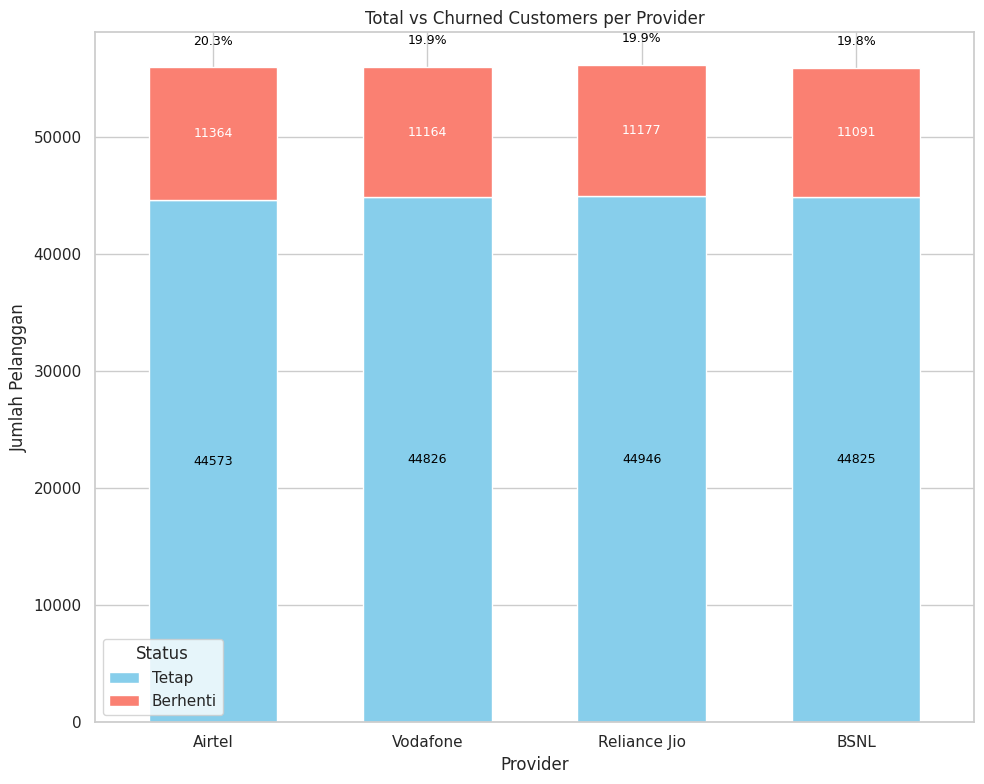

In [ ]:
plot_data = summary.copy()
plot_data['Tetap'] = plot_data['Total Pelanggan'] - plot_data['Jumlah Churn']
plot_data = plot_data[['Tetap', 'Jumlah Churn']]

fig, ax = plt.subplots(figsize=(10, 8))

bars = plot_data.plot(
    kind='bar',
    stacked=True,
    color=['skyblue', 'salmon'],
    ax=ax,
    width=0.6
)

for idx, (tetap, churn) in enumerate(zip(plot_data['Tetap'], plot_data['Jumlah Churn'])):
    total = tetap + churn
    ax.text(idx, tetap / 2, f"{tetap}", ha='center', va='center', color='black', fontsize=9)
    ax.text(idx, tetap + churn / 2, f"{churn}", ha='center', va='center', color='white', fontsize=9)
    ax.text(idx, total + total * 0.03, f"{(churn / total) * 100:.1f}%", ha='center', va='bottom', fontsize=9, color='black')

plt.title('Total vs Churned Customers per Provider', fontsize=12)
plt.xlabel('Provider')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)
plt.legend(['Tetap', 'Berhenti'], title='Status')
plt.tight_layout()
plt.show()

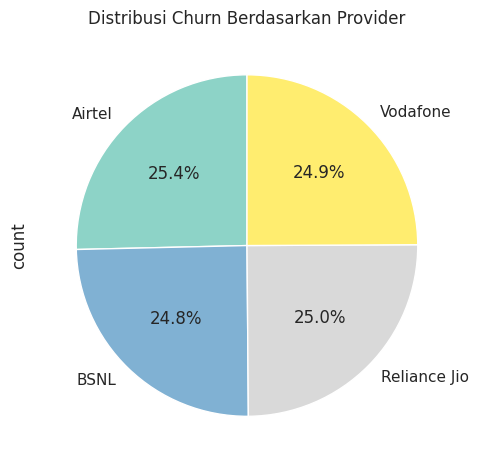

In [ ]:
churn_dist = churn_per_provider[churn_per_provider > 0]
churn_dist.plot.pie(autopct='%1.1f%%', figsize=(5,5), startangle=90, colormap='Set3')
plt.title('Distribusi Churn Berdasarkan Provider')
plt.tight_layout()
plt.show()

In [ ]:
tertinggi = summary['Churn Rate (%)'].idxmax()
terendah = summary['Churn Rate (%)'].idxmin()

print(f"Provider dengan churn rate tertinggi adalah: {tertinggi} ({summary.loc[tertinggi, 'Churn Rate (%)']:.2f}%)")
print(f"Provider dengan churn rate terendah adalah: {terendah} ({summary.loc[terendah, 'Churn Rate (%)']:.2f}%)")

print("\nInsight Bisnis:")
print("- Provider dengan churn tinggi perlu evaluasi pricing/service/coverage.")
print("- Ranking risiko churn dari tertinggi ke terendah:")
print(summary['Churn Rate (%)'].sort_values(ascending=False))


Provider dengan churn rate tertinggi adalah: Airtel (20.32%)
Provider dengan churn rate terendah adalah: BSNL (19.84%)

Insight Bisnis:
- Provider dengan churn tinggi perlu evaluasi pricing/service/coverage.
- Ranking risiko churn dari tertinggi ke terendah:
telecom_partner
Airtel          20.315712
Vodafone        19.939275
Reliance Jio    19.915186
BSNL            19.835110
Name: Churn Rate (%), dtype: float64


## 2.2

In [ ]:
df

,telecom_partner,gender,age,state,city,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,kategori_panggilan,kategori_pendapatan,kategori_sms,kategori_data,segment_pengguna
1,Reliance Jio,F,55,Mizoram,Mumbai,2020-01-01,2,130556,62,39,5973,0,Banyak,Tinggi,Banyak,Sedang,Heavy Users
2,Vodafone,F,57,Arunachal Pradesh,Delhi,2020-01-01,0,148828,49,24,193,1,Sedang,Tinggi,Sedikit,Sedikit,Light Users
3,BSNL,M,46,Tamil Nadu,Kolkata,2020-01-01,1,38722,80,25,9377,1,Banyak,Rendah,Sedang,Banyak,Heavy Users
4,BSNL,F,26,Tripura,Delhi,2020-01-01,2,55098,78,15,1393,0,Banyak,Rendah,Sedikit,Sedikit,Light Users
5,Vodafone,M,36,Uttarakhand,Chennai,2020-01-01,1,73452,91,24,8109,0,Banyak,Sedang,Sedikit,Banyak,Heavy Users
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,F,28,Mizoram,Kolkata,2023-05-03,3,130580,28,9,4102,0,Sedang,Tinggi,Sedikit,Sedang,Medium Users
243549,Reliance Jio,F,52,Assam,Kolkata,2023-05-03,0,82393,80,45,7521,0,Banyak,Sedang,Banyak,Sedang,Heavy Users
243550,Reliance Jio,M,59,Tripura,Kolkata,2023-05-03,4,51298,26,4,6547,0,Sedang,Rendah,Sedikit,Sedang,Medium Users
243551,BSNL,M,49,Madhya Pradesh,Kolkata,2023-05-03,2,83981,80,15,1125,0,Banyak,Sedang,Sedikit,Sedikit,Light Users


In [ ]:
df['total_usage'] = df['calls_made'] + df['sms_sent'] + df['data_used']

In [ ]:
df

,telecom_partner,gender,age,state,city,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,kategori_panggilan,kategori_pendapatan,kategori_sms,kategori_data,segment_pengguna,total_usage
1,Reliance Jio,F,55,Mizoram,Mumbai,2020-01-01,2,130556,62,39,5973,0,Banyak,Tinggi,Banyak,Sedang,Heavy Users,6074
2,Vodafone,F,57,Arunachal Pradesh,Delhi,2020-01-01,0,148828,49,24,193,1,Sedang,Tinggi,Sedikit,Sedikit,Light Users,266
3,BSNL,M,46,Tamil Nadu,Kolkata,2020-01-01,1,38722,80,25,9377,1,Banyak,Rendah,Sedang,Banyak,Heavy Users,9482
4,BSNL,F,26,Tripura,Delhi,2020-01-01,2,55098,78,15,1393,0,Banyak,Rendah,Sedikit,Sedikit,Light Users,1486
5,Vodafone,M,36,Uttarakhand,Chennai,2020-01-01,1,73452,91,24,8109,0,Banyak,Sedang,Sedikit,Banyak,Heavy Users,8224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,F,28,Mizoram,Kolkata,2023-05-03,3,130580,28,9,4102,0,Sedang,Tinggi,Sedikit,Sedang,Medium Users,4139
243549,Reliance Jio,F,52,Assam,Kolkata,2023-05-03,0,82393,80,45,7521,0,Banyak,Sedang,Banyak,Sedang,Heavy Users,7646
243550,Reliance Jio,M,59,Tripura,Kolkata,2023-05-03,4,51298,26,4,6547,0,Sedang,Rendah,Sedikit,Sedang,Medium Users,6577
243551,BSNL,M,49,Madhya Pradesh,Kolkata,2023-05-03,2,83981,80,15,1125,0,Banyak,Sedang,Sedikit,Sedikit,Light Users,1220


In [ ]:
df['usage_segment'] = pd.qcut(df['total_usage'], q=[0, 0.25, 0.75, 1], labels=['Low', 'Medium', 'High'])

In [ ]:
df

,telecom_partner,gender,age,state,city,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,kategori_panggilan,kategori_pendapatan,kategori_sms,kategori_data,segment_pengguna,total_usage,usage_segment
1,Reliance Jio,F,55,Mizoram,Mumbai,2020-01-01,2,130556,62,39,5973,0,Banyak,Tinggi,Banyak,Sedang,Heavy Users,6074,Medium
2,Vodafone,F,57,Arunachal Pradesh,Delhi,2020-01-01,0,148828,49,24,193,1,Sedang,Tinggi,Sedikit,Sedikit,Light Users,266,Low
3,BSNL,M,46,Tamil Nadu,Kolkata,2020-01-01,1,38722,80,25,9377,1,Banyak,Rendah,Sedang,Banyak,Heavy Users,9482,High
4,BSNL,F,26,Tripura,Delhi,2020-01-01,2,55098,78,15,1393,0,Banyak,Rendah,Sedikit,Sedikit,Light Users,1486,Low
5,Vodafone,M,36,Uttarakhand,Chennai,2020-01-01,1,73452,91,24,8109,0,Banyak,Sedang,Sedikit,Banyak,Heavy Users,8224,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,F,28,Mizoram,Kolkata,2023-05-03,3,130580,28,9,4102,0,Sedang,Tinggi,Sedikit,Sedang,Medium Users,4139,Medium
243549,Reliance Jio,F,52,Assam,Kolkata,2023-05-03,0,82393,80,45,7521,0,Banyak,Sedang,Banyak,Sedang,Heavy Users,7646,High
243550,Reliance Jio,M,59,Tripura,Kolkata,2023-05-03,4,51298,26,4,6547,0,Sedang,Rendah,Sedikit,Sedang,Medium Users,6577,Medium
243551,BSNL,M,49,Madhya Pradesh,Kolkata,2023-05-03,2,83981,80,15,1125,0,Banyak,Sedang,Sedikit,Sedikit,Light Users,1220,Low


In [ ]:
usage_cols = ['calls_made', 'sms_sent', 'data_used', 'total_usage']
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df[usage_cols]), columns=[f'{col}_std' for col in usage_cols])

In [ ]:
df

,telecom_partner,gender,age,state,city,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,kategori_panggilan,kategori_pendapatan,kategori_sms,kategori_data,segment_pengguna,total_usage,usage_segment
1,Reliance Jio,F,55,Mizoram,Mumbai,2020-01-01,2,130556,62,39,5973,0,Banyak,Tinggi,Banyak,Sedang,Heavy Users,6074,Medium
2,Vodafone,F,57,Arunachal Pradesh,Delhi,2020-01-01,0,148828,49,24,193,1,Sedang,Tinggi,Sedikit,Sedikit,Light Users,266,Low
3,BSNL,M,46,Tamil Nadu,Kolkata,2020-01-01,1,38722,80,25,9377,1,Banyak,Rendah,Sedang,Banyak,Heavy Users,9482,High
4,BSNL,F,26,Tripura,Delhi,2020-01-01,2,55098,78,15,1393,0,Banyak,Rendah,Sedikit,Sedikit,Light Users,1486,Low
5,Vodafone,M,36,Uttarakhand,Chennai,2020-01-01,1,73452,91,24,8109,0,Banyak,Sedang,Sedikit,Banyak,Heavy Users,8224,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,F,28,Mizoram,Kolkata,2023-05-03,3,130580,28,9,4102,0,Sedang,Tinggi,Sedikit,Sedang,Medium Users,4139,Medium
243549,Reliance Jio,F,52,Assam,Kolkata,2023-05-03,0,82393,80,45,7521,0,Banyak,Sedang,Banyak,Sedang,Heavy Users,7646,High
243550,Reliance Jio,M,59,Tripura,Kolkata,2023-05-03,4,51298,26,4,6547,0,Sedang,Rendah,Sedikit,Sedang,Medium Users,6577,Medium
243551,BSNL,M,49,Madhya Pradesh,Kolkata,2023-05-03,2,83981,80,15,1125,0,Banyak,Sedang,Sedikit,Sedikit,Light Users,1220,Low


In [ ]:
print(df[['calls_made', 'sms_sent', 'data_used', 'total_usage', 'usage_segment']].head())

   calls_made  sms_sent  data_used  total_usage usage_segment
1          62        39       5973         6074        Medium
2          49        24        193          266           Low
3          80        25       9377         9482          High
4          78        15       1393         1486           Low
5          91        24       8109         8224          High


In [ ]:
usage_cols = ['calls_made', 'sms_sent', 'data_used']
print(df[usage_cols].describe())

          calls_made       sms_sent      data_used
count  223966.000000  223966.000000  223966.000000
mean       50.490378      24.769269    5126.822960
std        28.464511      14.202591    2851.962886
min         0.000000       0.000000       0.000000
25%        26.000000      13.000000    2674.000000
50%        50.000000      25.000000    5108.000000
75%        75.000000      37.000000    7555.000000
max       108.000000      53.000000   10991.000000


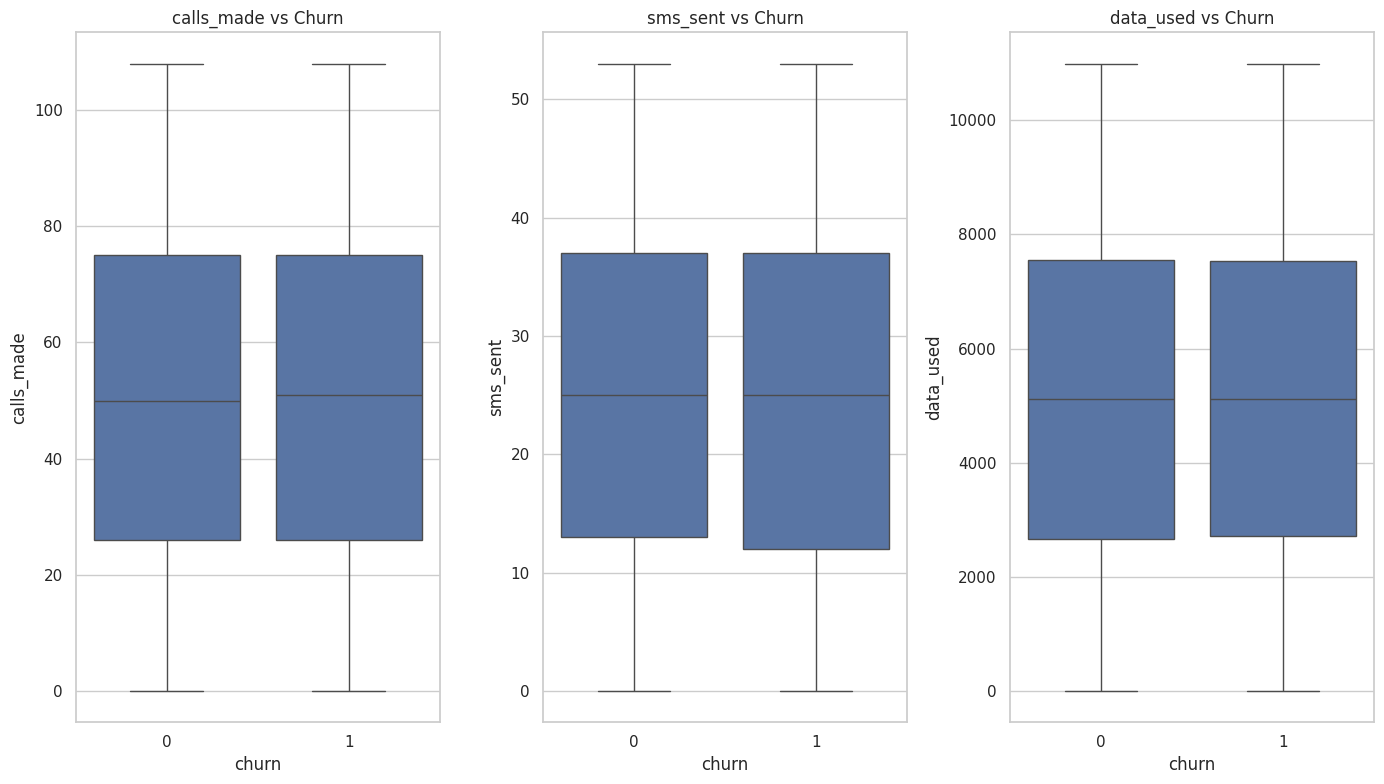

In [ ]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(usage_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='churn', y=col)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

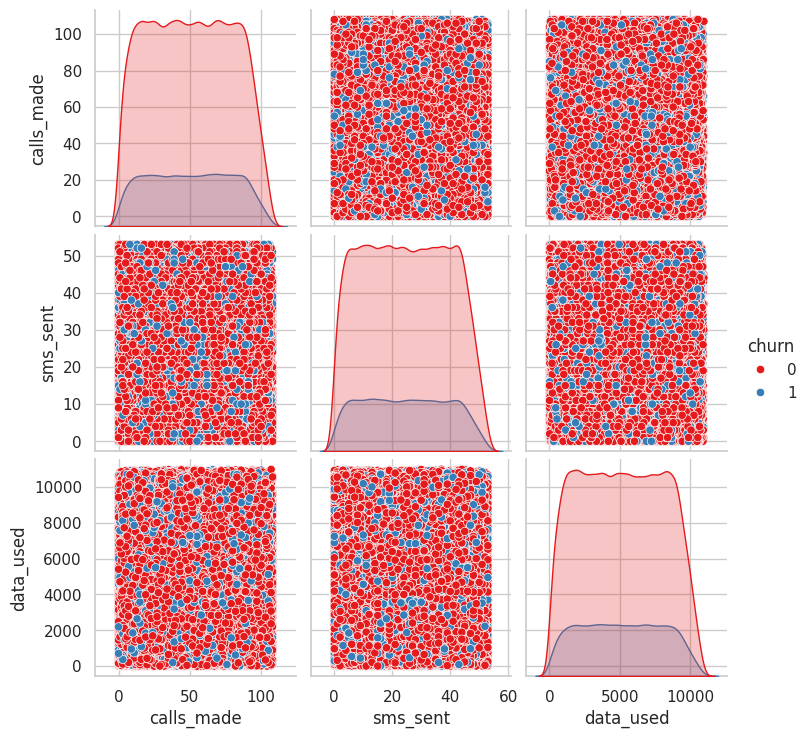

In [ ]:
sns.pairplot(df, vars=usage_cols, hue='churn', palette='Set1', diag_kind='kde')
plt.show()

In [ ]:
correlation_metrics = ['calls_made', 'sms_sent', 'data_used', 'total_usage']
correlations = df[correlation_metrics + ['churn']].corr()['churn'].drop('churn')
print("Korelasi dengan Churn:\n", correlations)

Korelasi dengan Churn:
 calls_made     0.001885
sms_sent      -0.001877
data_used      0.001325
total_usage    0.001335
Name: churn, dtype: float64


Churn rate per usage segment:
                 count    sum  churn_rate
usage_segment                           
Low             56004  11032   19.698593
Medium         111988  22639   20.215559
High            55974  11125   19.875299


/tmp/ipython-input-60-2991269861.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



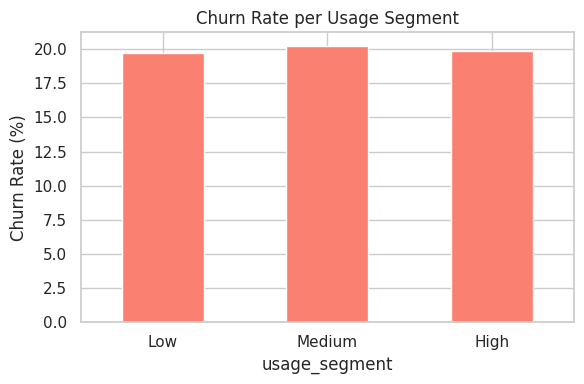

In [ ]:
segmen_churn = df.groupby('usage_segment')['churn'].agg(['count', 'sum'])
segmen_churn['churn_rate'] = segmen_churn['sum'] / segmen_churn['count'] * 100
print("Churn rate per usage segment:\n", segmen_churn)

segmen_churn['churn_rate'].plot(kind='bar', color='salmon', figsize=(6,4), title='Churn Rate per Usage Segment')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
retained = df[df['churn'] == 0]
churned = df[df['churn'] == 1]

for col in ['calls_made', 'sms_sent', 'data_used', 'total_usage']:
    stat, p = mannwhitneyu(retained[col], churned[col])
    print(f"{col}: U-test p-value = {p:.4f}")

anova_result = f_oneway(*[df[df['usage_segment'] == seg]['churn'] for seg in ['Low', 'Medium', 'High']])
print(f"\nANOVA Test p-value = {anova_result.pvalue:.4f}")

calls_made: U-test p-value = 0.3381
sms_sent: U-test p-value = 0.3733
data_used: U-test p-value = 0.5178
total_usage: U-test p-value = 0.5143

ANOVA Test p-value = 0.0306


In [ ]:
features = ['calls_made', 'sms_sent', 'data_used']
X = df[features].replace([np.inf, -np.inf], np.nan).dropna()
y = df.loc[X.index, 'churn']
X = sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.500415
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:               223966
Model:                          Logit   Df Residuals:                   223962
Method:                           MLE   Df Model:                            3
Date:                Fri, 27 Jun 2025   Pseudo R-squ.:               8.812e-06
Time:                        02:37:24   Log-Likelihood:            -1.1208e+05
converged:                       True   LL-Null:                   -1.1208e+05
Covariance Type:            nonrobust   LLR p-value:                    0.5776
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3923      0.017    -81.648      0.000      -1.426      -1.359
calls_made     0.0002      0.

In [ ]:
top_callers = df[df['calls_made'] > df['calls_made'].quantile(0.90)]
top_data_users = df[df['data_used'] > df['data_used'].quantile(0.90)]

print("Top Callers Churn Rate:", top_callers['churn'].mean() * 100)
print("Top Data Users Churn Rate:", top_data_users['churn'].mean() * 100)

Top Callers Churn Rate: 19.626125508478452
Top Data Users Churn Rate: 19.88387673068334


## 2.3

In [ ]:
print(df['estimated_salary'].describe())

count    223966.000000
mean      85045.042114
std       37521.056232
min       20000.000000
25%       52576.250000
50%       85008.000000
75%      117553.000000
max      149999.000000
Name: estimated_salary, dtype: float64


<Axes: xlabel='estimated_salary'>

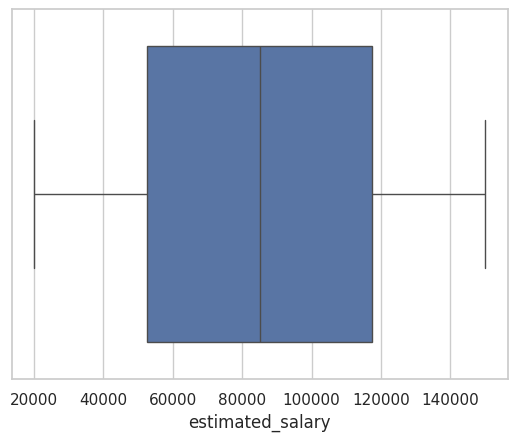

In [ ]:
sns.boxplot(x = df["estimated_salary"])

In [ ]:
Q1 = df['estimated_salary'].quantile(0.25)
Q3 = df['estimated_salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['estimated_salary'] < Q1 - 1.5 * IQR) | (df['estimated_salary'] > Q3 + 1.5 * IQR)]
print(f"Jumlah outliers: {len(outliers)}")

Jumlah outliers: 0


In [ ]:
q25 = df['estimated_salary'].quantile(0.25)
q75 = df['estimated_salary'].quantile(0.75)

def segment_salary(salary):
    if salary < q25:
        return 'Low'
    elif salary > q75:
        return 'High'
    else:
        return 'Middle'

df['salary_segment'] = df['estimated_salary'].apply(segment_salary)

In [ ]:
salary_churn = df.groupby('salary_segment')['churn'].agg(['count', 'sum'])
salary_churn['churn_rate'] = (salary_churn['sum'] / salary_churn['count']) * 100
print(salary_churn)

print(df.groupby('churn')['estimated_salary'].mean())

                 count    sum  churn_rate
salary_segment                           
High             55990  11041   19.719593
Low              55992  11257   20.104658
Middle          111984  22498   20.090370
churn
0    85113.597840
1    84770.840633
Name: estimated_salary, dtype: float64


In [ ]:
churned = df[df['churn'] == 1]['estimated_salary']
retained = df[df['churn'] == 0]['estimated_salary']
t_stat, p_val = ttest_ind(churned, retained, equal_var=False)
print(f"T-test: t = {t_stat:.3f}, p = {p_val:.3f}")

T-test: t = -1.732, p = 0.083


In [ ]:
contingency = pd.crosstab(df['salary_segment'], df['churn'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square test: chi2 = {chi2:.3f}, p = {p:.3f}")

Chi-square test: chi2 = 3.706, p = 0.157


In [ ]:
X = df[['estimated_salary']]
y = df['churn']
X = sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.500413
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:               223966
Model:                          Logit   Df Residuals:                   223964
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Jun 2025   Pseudo R-squ.:               1.334e-05
Time:                        02:37:25   Log-Likelihood:            -1.1208e+05
converged:                       True   LL-Null:                   -1.1208e+05
Covariance Type:            nonrobust   LLR p-value:                   0.08375
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3655      0.013   -104.554      0.000      -1.391      -1.340
estimated_s

## 3.1


In [ ]:
print(f"Churn rate: {df['churn'].mean():.2%}")

Churn rate: 20.00%


In [ ]:
churn_by_usage = df.groupby('usage_segment', observed=False)['churn'].mean().reset_index()
print(churn_by_usage)

  usage_segment     churn
0           Low  0.196986
1        Medium  0.202156
2          High  0.198753


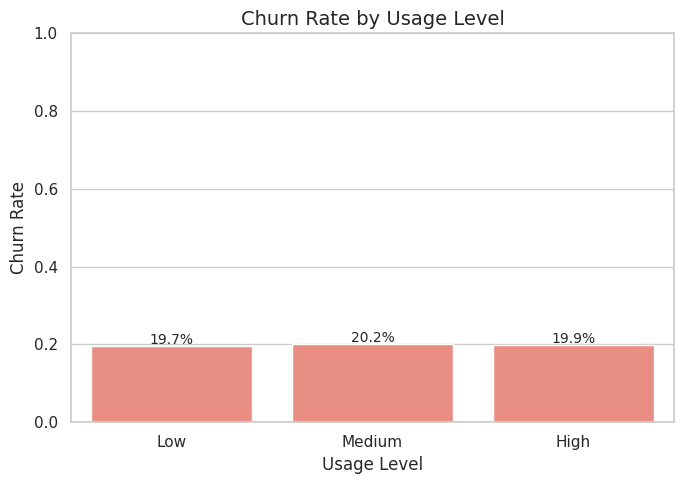

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(data=churn_by_usage, x='usage_segment', y='churn', color='salmon')

for i, row in churn_by_usage.iterrows():
    plt.text(i, row['churn'] + 0.005, f"{row['churn']*100:.1f}%", ha='center', fontsize=10)

plt.title('Churn Rate by Usage Level', fontsize=14)
plt.ylabel('Churn Rate')
plt.xlabel('Usage Level')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
high_usage_threshold = df['total_usage'].quantile(0.75)  # Top 25%
high_usage_customers = df[df['total_usage'] > high_usage_threshold]
high_usage_churn_rate = high_usage_customers['churn'].mean()

print("HIGH TOTAL USAGE ANALYSIS (Top 25%):")
print(f"   • Threshold: {high_usage_threshold:.0f}")
print(f"   • High Usage Customers: {len(high_usage_customers)}")
print(f"   • High Usage Churn Rate: {high_usage_churn_rate:.1%}")
print()

HIGH TOTAL USAGE ANALYSIS (Top 25%):
   • Threshold: 7632
   • High Usage Customers: 55974
   • High Usage Churn Rate: 19.9%



In [ ]:
# Analyze churn by segment
usage_churn = df.groupby('usage_segment', observed=True)['churn'].agg(['count', 'sum', 'mean']).round(3)
usage_churn.columns = ['Total_Customers', 'Churned', 'Churn_Rate']

highest_risk_segment = usage_churn.loc[usage_churn['Churn_Rate'].idxmax()]

print("CHURN RATE BY USAGE SEGMENT:")
print(usage_churn)
print()

print("SEGMEN PALING BERISIKO:")
print(f"   • Segment: {usage_churn['Churn_Rate'].idxmax()}")
print(f"   • Churn Rate: {highest_risk_segment['Churn_Rate']:.1%}")
print(f"   • Customers at Risk: {int(highest_risk_segment['Churned'])}/{int(highest_risk_segment['Total_Customers'])}")
print()

CHURN RATE BY USAGE SEGMENT:
               Total_Customers  Churned  Churn_Rate
usage_segment                                      
Low                      56004    11032       0.197
Medium                  111988    22639       0.202
High                     55974    11125       0.199

SEGMEN PALING BERISIKO:
   • Segment: Medium
   • Churn Rate: 20.2%
   • Customers at Risk: 22639/111988



## 3.2

In [ ]:
df

,telecom_partner,gender,age,state,city,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,kategori_panggilan,kategori_pendapatan,kategori_sms,kategori_data,segment_pengguna,total_usage,usage_segment,salary_segment
1,Reliance Jio,F,55,Mizoram,Mumbai,2020-01-01,2,130556,62,39,5973,0,Banyak,Tinggi,Banyak,Sedang,Heavy Users,6074,Medium,High
2,Vodafone,F,57,Arunachal Pradesh,Delhi,2020-01-01,0,148828,49,24,193,1,Sedang,Tinggi,Sedikit,Sedikit,Light Users,266,Low,High
3,BSNL,M,46,Tamil Nadu,Kolkata,2020-01-01,1,38722,80,25,9377,1,Banyak,Rendah,Sedang,Banyak,Heavy Users,9482,High,Low
4,BSNL,F,26,Tripura,Delhi,2020-01-01,2,55098,78,15,1393,0,Banyak,Rendah,Sedikit,Sedikit,Light Users,1486,Low,Middle
5,Vodafone,M,36,Uttarakhand,Chennai,2020-01-01,1,73452,91,24,8109,0,Banyak,Sedang,Sedikit,Banyak,Heavy Users,8224,High,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,F,28,Mizoram,Kolkata,2023-05-03,3,130580,28,9,4102,0,Sedang,Tinggi,Sedikit,Sedang,Medium Users,4139,Medium,High
243549,Reliance Jio,F,52,Assam,Kolkata,2023-05-03,0,82393,80,45,7521,0,Banyak,Sedang,Banyak,Sedang,Heavy Users,7646,High,Middle
243550,Reliance Jio,M,59,Tripura,Kolkata,2023-05-03,4,51298,26,4,6547,0,Sedang,Rendah,Sedikit,Sedang,Medium Users,6577,Medium,Low
243551,BSNL,M,49,Madhya Pradesh,Kolkata,2023-05-03,2,83981,80,15,1125,0,Banyak,Sedang,Sedikit,Sedikit,Light Users,1220,Low,Middle


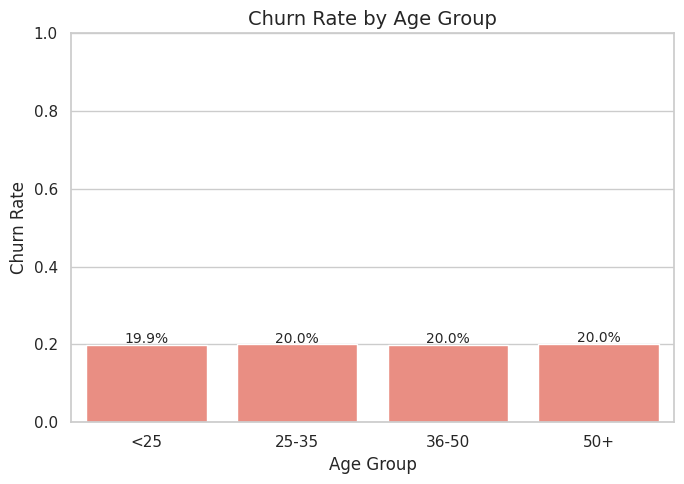

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 50, 100],
                         labels=['<25', '25-35', '36-50', '50+'])

churn_by_age = df.groupby('age_group', observed=False)['churn'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=churn_by_age, x='age_group', y='churn', color='salmon')
for i, row in churn_by_age.iterrows():
    plt.text(i, row['churn'] + 0.005, f"{row['churn']*100:.1f}%", ha='center', fontsize=10)

plt.title('Churn Rate by Age Group', fontsize=14)
plt.ylabel('Churn Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

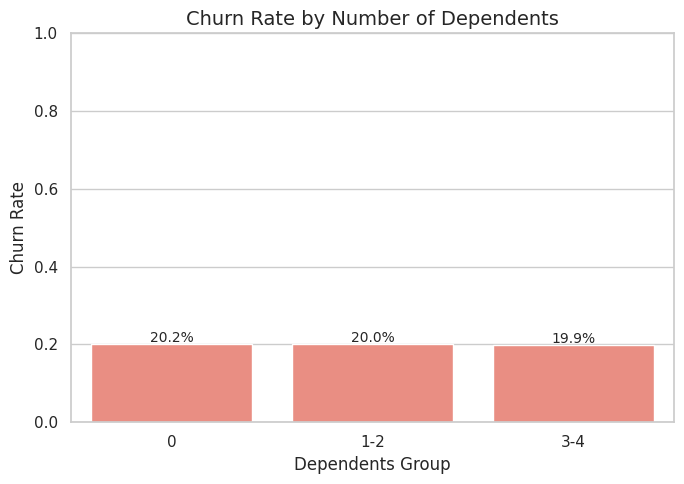

In [ ]:
df['num_dependents'] = pd.to_numeric(df['num_dependents'], errors='coerce')
df['dependents_group'] = pd.cut(
    df['num_dependents'],
    bins=[-1, 0, 2, 4],
    labels=['0', '1-2', '3-4'],
    include_lowest=True
)


churn_by_dependents = df.groupby('dependents_group', observed=False)['churn'].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(data=churn_by_dependents, x='dependents_group', y='churn', color='salmon')
for i, row in churn_by_dependents.iterrows():
    plt.text(i, row['churn'] + 0.005, f"{row['churn']*100:.1f}%", ha='center', fontsize=10)

plt.title('Churn Rate by Number of Dependents', fontsize=14)
plt.ylabel('Churn Rate')
plt.xlabel('Dependents Group')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 5. Prediction Churn

In [ ]:
df

,telecom_partner,gender,age,state,city,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,...,kategori_panggilan,kategori_pendapatan,kategori_sms,kategori_data,segment_pengguna,total_usage,usage_segment,salary_segment,age_group,dependents_group
1,Reliance Jio,F,55,Mizoram,Mumbai,2020-01-01,2,130556,62,39,...,Banyak,Tinggi,Banyak,Sedang,Heavy Users,6074,Medium,High,50+,1-2
2,Vodafone,F,57,Arunachal Pradesh,Delhi,2020-01-01,0,148828,49,24,...,Sedang,Tinggi,Sedikit,Sedikit,Light Users,266,Low,High,50+,0
3,BSNL,M,46,Tamil Nadu,Kolkata,2020-01-01,1,38722,80,25,...,Banyak,Rendah,Sedang,Banyak,Heavy Users,9482,High,Low,36-50,1-2
4,BSNL,F,26,Tripura,Delhi,2020-01-01,2,55098,78,15,...,Banyak,Rendah,Sedikit,Sedikit,Light Users,1486,Low,Middle,25-35,1-2
5,Vodafone,M,36,Uttarakhand,Chennai,2020-01-01,1,73452,91,24,...,Banyak,Sedang,Sedikit,Banyak,Heavy Users,8224,High,Middle,36-50,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,F,28,Mizoram,Kolkata,2023-05-03,3,130580,28,9,...,Sedang,Tinggi,Sedikit,Sedang,Medium Users,4139,Medium,High,25-35,3-4
243549,Reliance Jio,F,52,Assam,Kolkata,2023-05-03,0,82393,80,45,...,Banyak,Sedang,Banyak,Sedang,Heavy Users,7646,High,Middle,50+,0
243550,Reliance Jio,M,59,Tripura,Kolkata,2023-05-03,4,51298,26,4,...,Sedang,Rendah,Sedikit,Sedang,Medium Users,6577,Medium,Low,50+,3-4
243551,BSNL,M,49,Madhya Pradesh,Kolkata,2023-05-03,2,83981,80,15,...,Banyak,Sedang,Sedikit,Sedikit,Light Users,1220,Low,Middle,36-50,1-2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223966 entries, 1 to 243552
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   telecom_partner       223966 non-null  object  
 1   gender                223966 non-null  object  
 2   age                   223966 non-null  int64   
 3   state                 223966 non-null  object  
 4   city                  223966 non-null  object  
 5   date_of_registration  223966 non-null  object  
 6   num_dependents        223966 non-null  int64   
 7   estimated_salary      223966 non-null  int64   
 8   calls_made            223966 non-null  int64   
 9   sms_sent              223966 non-null  int64   
 10  data_used             223966 non-null  int64   
 11  churn                 223966 non-null  int64   
 12  kategori_panggilan    223966 non-null  object  
 13  kategori_pendapatan   223966 non-null  object  
 14  kategori_sms          223966 non-null  ob

In [ ]:
df = df.drop(columns=['date_of_registration', 'state', 'telecom_partner', 'state',
                      'city', 'age_group', 'dependents_group', 'salary_segment',
                      'usage_segment', 'segment_pengguna', 'kategori_pendapatan',
                      'kategori_panggilan', 'kategori_sms', 'kategori_data', 'total_usage'])

In [ ]:
df

,gender,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
1,F,55,2,130556,62,39,5973,0
2,F,57,0,148828,49,24,193,1
3,M,46,1,38722,80,25,9377,1
4,F,26,2,55098,78,15,1393,0
5,M,36,1,73452,91,24,8109,0
...,...,...,...,...,...,...,...,...
243548,F,28,3,130580,28,9,4102,0
243549,F,52,0,82393,80,45,7521,0
243550,M,59,4,51298,26,4,6547,0
243551,M,49,2,83981,80,15,1125,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223966 entries, 1 to 243552
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   gender            223966 non-null  object
 1   age               223966 non-null  int64 
 2   num_dependents    223966 non-null  int64 
 3   estimated_salary  223966 non-null  int64 
 4   calls_made        223966 non-null  int64 
 5   sms_sent          223966 non-null  int64 
 6   data_used         223966 non-null  int64 
 7   churn             223966 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 23.4+ MB


In [ ]:
df.describe()

,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000,223966.000000
mean,46.075418,1.998607,85045.042114,50.490378,24.769269,5126.822960,0.200013
std,16.441448,1.414828,37521.056232,28.464511,14.202591,2851.962886,0.400010
min,18.000000,0.000000,20000.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,52576.250000,26.000000,13.000000,2674.000000,0.000000
50%,46.000000,2.000000,85008.000000,50.000000,25.000000,5108.000000,0.000000
75%,60.000000,3.000000,117553.000000,75.000000,37.000000,7555.000000,0.000000
max,74.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [ ]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:\n", missing_values)

Jumlah nilai yang hilang di setiap kolom:
 gender              0
age                 0
num_dependents      0
estimated_salary    0
calls_made          0
sms_sent            0
data_used           0
churn               0
dtype: int64


In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='age'>

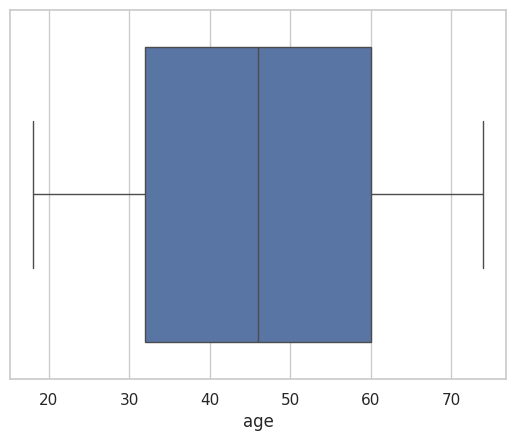

In [ ]:
sns.boxplot(x = df["age"])

<Axes: xlabel='num_dependents'>

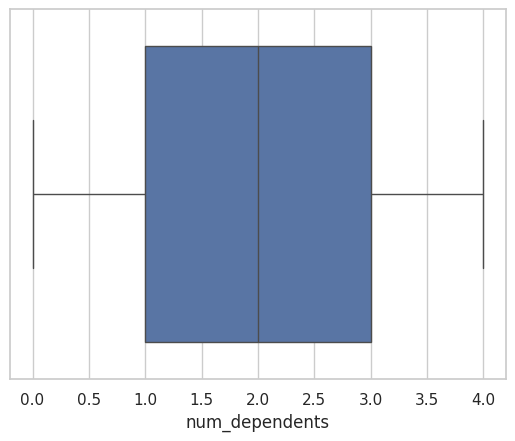

In [ ]:
sns.boxplot(x = df["num_dependents"])

<Axes: xlabel='estimated_salary'>

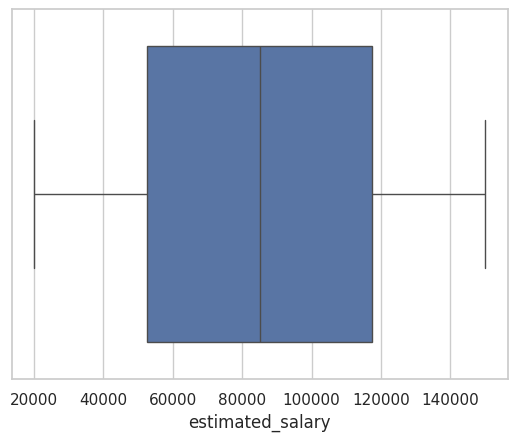

In [ ]:
sns.boxplot(x = df["estimated_salary"])

<Axes: xlabel='calls_made'>

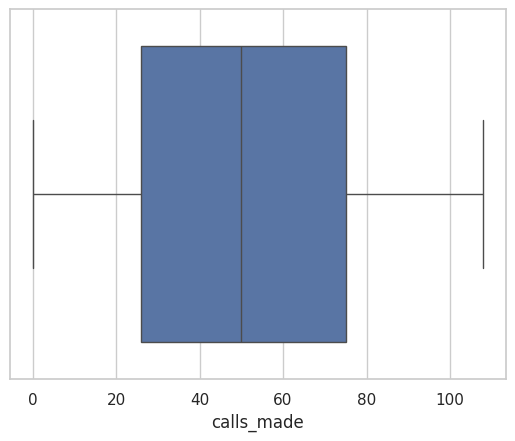

In [ ]:
sns.boxplot(x = df["calls_made"])

<Axes: xlabel='sms_sent'>

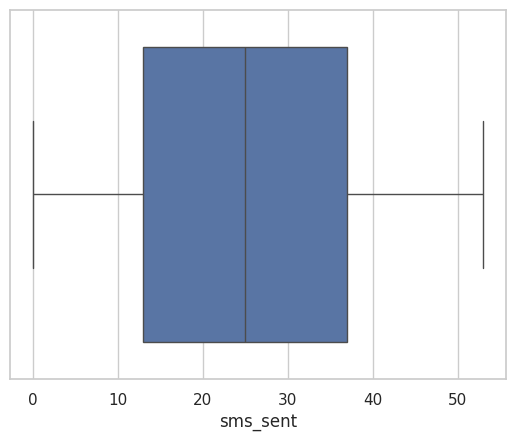

In [ ]:
sns.boxplot(x = df["sms_sent"])

<Axes: xlabel='data_used'>

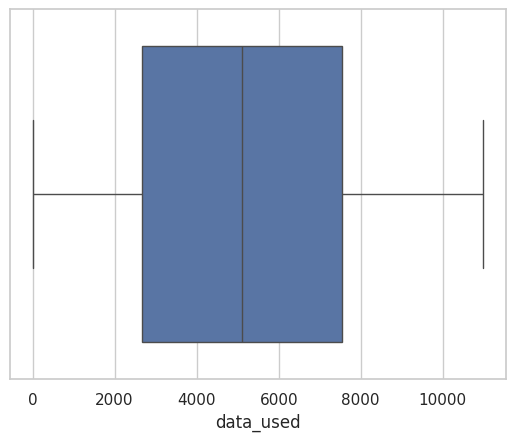

In [ ]:
sns.boxplot(x = df["data_used"])

In [ ]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df

,gender,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
1,0,55,2,130556,62,39,5973,0
2,0,57,0,148828,49,24,193,1
3,1,46,1,38722,80,25,9377,1
4,0,26,2,55098,78,15,1393,0
5,1,36,1,73452,91,24,8109,0
...,...,...,...,...,...,...,...,...
243548,0,28,3,130580,28,9,4102,0
243549,0,52,0,82393,80,45,7521,0
243550,1,59,4,51298,26,4,6547,0
243551,1,49,2,83981,80,15,1125,0


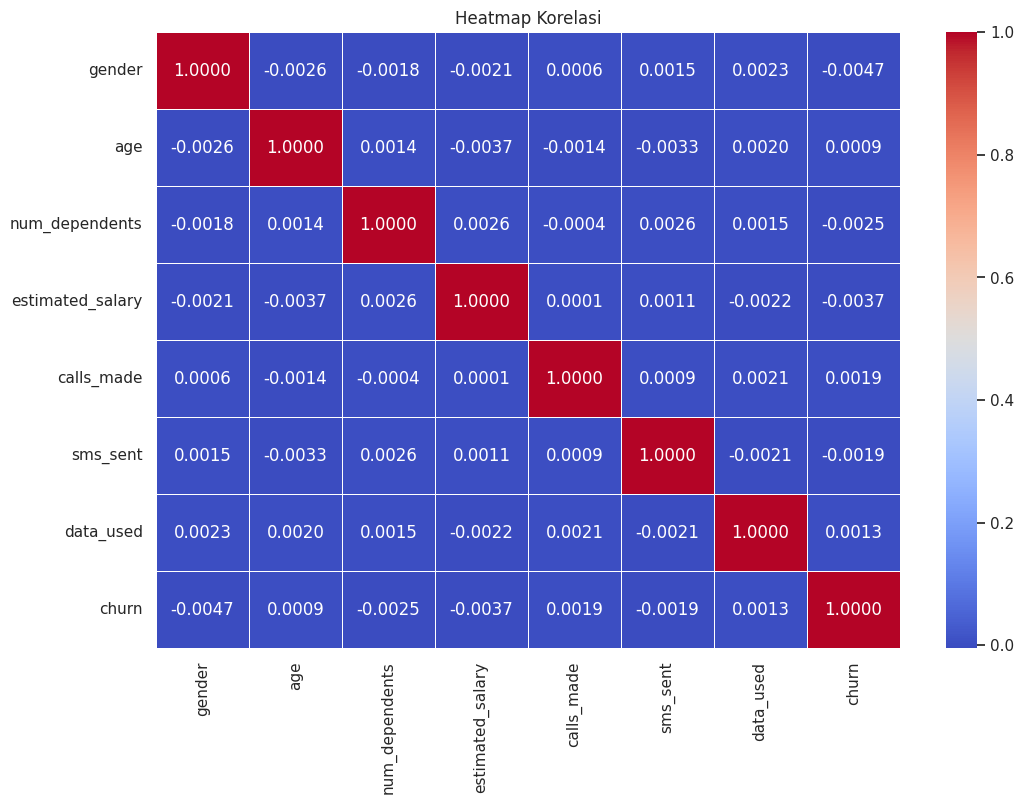

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)

plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
df

,gender,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
1,0,55,2,130556,62,39,5973,0
2,0,57,0,148828,49,24,193,1
3,1,46,1,38722,80,25,9377,1
4,0,26,2,55098,78,15,1393,0
5,1,36,1,73452,91,24,8109,0
...,...,...,...,...,...,...,...,...
243548,0,28,3,130580,28,9,4102,0
243549,0,52,0,82393,80,45,7521,0
243550,1,59,4,51298,26,4,6547,0
243551,1,49,2,83981,80,15,1125,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["churn"],axis = 1)
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total # Total dataset: {len(X)}')
print(f'Total # train dataset: {len(X_train)}')
print(f'Total # test dataset: {len(X_test)}')

Total # Total dataset: 223966
Total # train dataset: 179172
Total # test dataset: 44794


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Distribusi Kelas:
churn
0    79.99875
1    20.00125
Name: proportion, dtype: float64


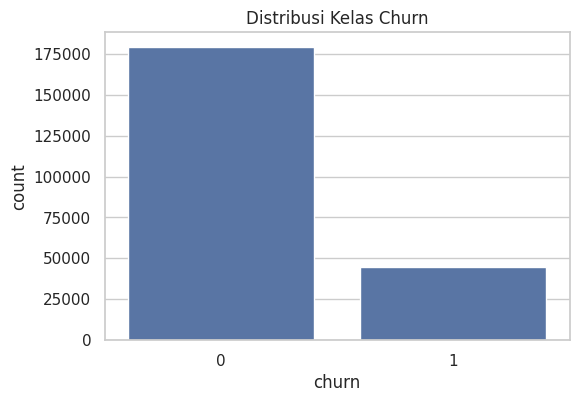

In [ ]:
print("Distribusi Kelas:")
print(y.value_counts(normalize=True) * 100)

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Distribusi Kelas Churn')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("\nSetelah SMOTE:")
print(pd.Series(y_res).value_counts())


Setelah SMOTE:
churn
0    143226
1    143226
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
rf_smote = RandomForestClassifier(n_estimators=50, random_state=42)
rf_smote.fit(X_res, y_res)
y_pred_rf_smote = rf_smote.predict(X_test)

print("\nRandom Forest + SMOTE Performance:")
print(classification_report(y_test, y_pred_rf_smote))


Random Forest + SMOTE Performance:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     35944
           1       0.20      0.10      0.13      8850

    accuracy                           0.74     44794
   macro avg       0.50      0.50      0.49     44794
weighted avg       0.68      0.74      0.71     44794



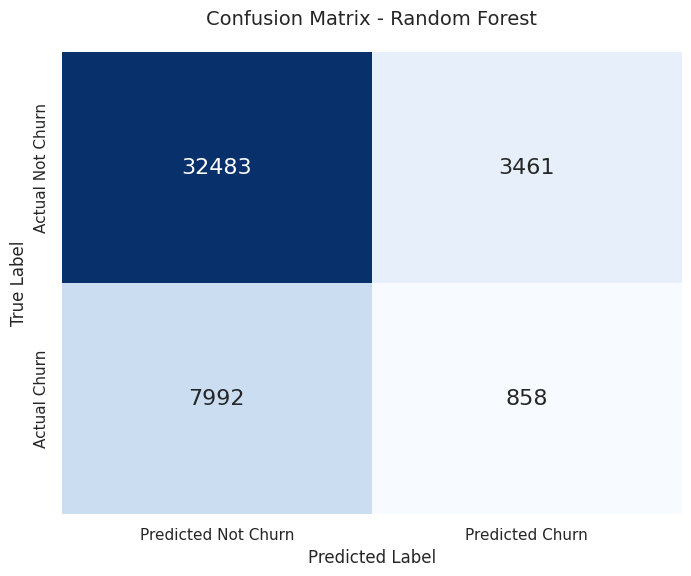

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Churn', 'Predicted Churn'],
            yticklabels=['Actual Not Churn', 'Actual Churn'],
            annot_kws={"size": 16},
            cbar=False)

plt.title('Confusion Matrix - Random Forest', fontsize=14, pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [ ]:
knn_smote = KNeighborsClassifier(n_neighbors=7)
knn_smote.fit(X_res, y_res)
y_pred_knn_smote = knn_smote.predict(X_test)

print("\nKNN + SMOTE Performance:")
print(classification_report(y_test, y_pred_knn_smote))


KNN + SMOTE Performance:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67     35944
           1       0.20      0.43      0.27      8850

    accuracy                           0.54     44794
   macro avg       0.50      0.50      0.47     44794
weighted avg       0.68      0.54      0.59     44794



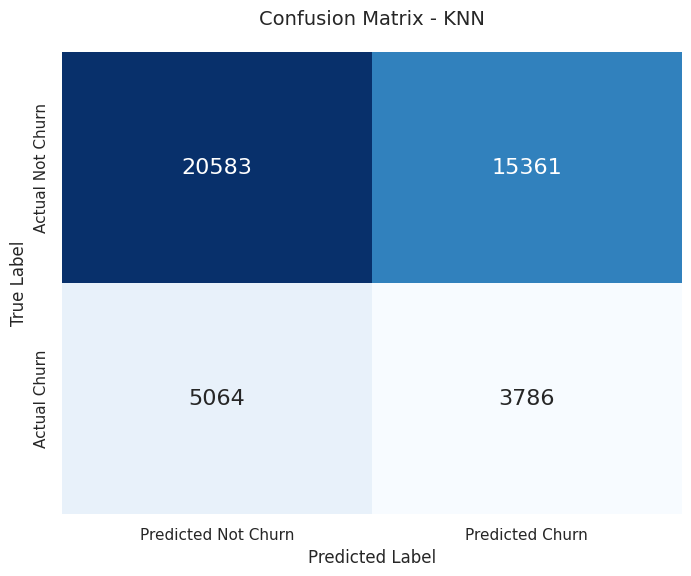

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Churn', 'Predicted Churn'],
            yticklabels=['Actual Not Churn', 'Actual Churn'],
            annot_kws={"size": 16},
            cbar=False)

plt.title('Confusion Matrix - KNN', fontsize=14, pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [ ]:
nb_smote = GaussianNB()
nb_smote.fit(X_res, y_res)
y_pred_nb_smote = nb_smote.predict(X_test)

print("\nNaive Bayes + SMOTE Performance:")
print(classification_report(y_test, y_pred_nb_smote))


Naive Bayes + SMOTE Performance:
              precision    recall  f1-score   support

           0       0.80      0.48      0.60     35944
           1       0.20      0.51      0.28      8850

    accuracy                           0.49     44794
   macro avg       0.50      0.50      0.44     44794
weighted avg       0.68      0.49      0.54     44794



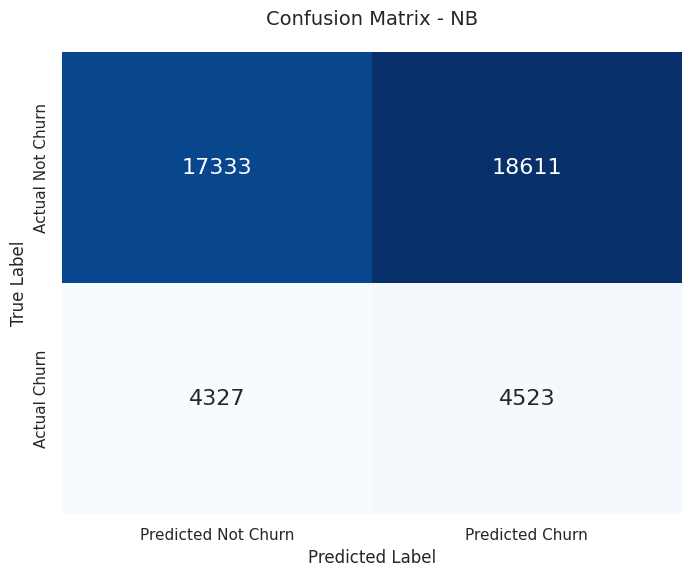

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Churn', 'Predicted Churn'],
            yticklabels=['Actual Not Churn', 'Actual Churn'],
            annot_kws={"size": 16},
            cbar=False)

plt.title('Confusion Matrix - NB', fontsize=14, pad=20)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [110]:
pip freeze > requirements.txt